In [2]:
# KHOÁ LUẬN TỐT NGHIỆP - MODELS - PHẦN 2
# Họ và tên: Lại Minh Phú - MSSV: 20127593
# Họ và tên: Hồ Minh Thanh Tài - MSSV: 20127068

In [3]:
%pip install imblearn
%pip install lightgbm
%pip install xgboost
%pip install catboost
%pip install --quiet optuna

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.decomposition import PCA
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn import datasets, linear_model, metrics
from imblearn.over_sampling import SMOTE

# Thự viên các mô hình sử dụng
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import lightgbm as lgb
import xgboost as xgb
import catboost as cb


%matplotlib inline
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc, ConfusionMatrixDisplay

# Các thư viện khác
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
import collections
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
# 284315 Not-Fraud, 492 Fraud
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
x = df.drop(['Class','Time'], axis=1)

y = df['Class']

## Spilt thành tập train và tập test

In [8]:
seed = 42

# Split the data into train, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

## Scale 

In [9]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train

array([[ 8.66514037e-01, -3.18740903e-01, -2.57831791e-01, ...,
         2.69826619e-01, -4.45139004e-01, -1.67972028e-01],
       [-1.87412161e-01, -4.94335107e-01,  7.18249023e-01, ...,
        -2.29014575e+00, -1.18801493e+00,  3.34265734e-01],
       [ 2.43934573e-02,  5.38221071e-01, -3.86388287e-01, ...,
         1.26284605e+00,  4.48261891e-01, -1.40000000e-01],
       ...,
       [-7.36254539e-02,  6.61185829e-01,  7.02202848e-01, ...,
        -7.54486386e-01, -1.57908244e+00, -2.52587413e-01],
       [-1.32706845e+00,  1.63267692e+00, -1.40917571e+00, ...,
         3.05218623e+00,  2.46838464e+00, -2.93706294e-01],
       [ 5.43598556e-01, -6.06975975e-01,  1.08415011e-01, ...,
        -8.78479616e-04,  2.07096240e-01,  1.27272727e+00]])

In [11]:
X_test

array([[-7.40091104e+00,  6.07683172e+00, -9.82623873e+00, ...,
        -1.24410856e+01, -8.01989481e+00,  4.78587413e+00],
       [ 1.43967206e-01, -2.00432112e+00, -1.63402851e-01, ...,
         2.44127890e-01,  6.89809266e-01,  6.96671329e+00],
       [ 6.18042059e-01, -4.68482847e-01, -5.43876581e-03, ...,
         6.18960568e-02, -5.12163588e-02,  1.25874126e-01],
       ...,
       [ 1.00485653e-02, -1.25394779e-01, -7.54347971e-01, ...,
         2.19564896e+00,  2.60956835e+00, -2.00979021e-01],
       [-2.29493924e-01,  6.60140661e-01,  7.78913926e-01, ...,
         2.41254081e-01, -2.13886375e+00, -2.57482517e-01],
       [-7.19520654e-01,  6.60807294e-01, -3.61072611e-01, ...,
         7.66141087e-01, -4.70610893e+00,  1.23679720e+01]])

## SMOTE

In [12]:
print('Kích thước tập dữ liệu trước SMOTE %s' % Counter(y_train))

smt = SMOTE(random_state=42)
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

print('Kích thước tập dữ liệu trước SMOTE %s' % Counter(y_train_smt))

Kích thước tập dữ liệu trước SMOTE Counter({0: 227451, 1: 394})
Kích thước tập dữ liệu trước SMOTE Counter({0: 227451, 1: 227451})


### Biểu diễn đồ thị ROC-AUC

In [13]:
def plot_roc_cur(FPR, TPR):  
    plt.plot(FPR, TPR, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### Biểu diễn đồ thị PR-AUC

In [14]:
def plot_pr_cur(precision, recall, pr_auc):
    plt.plot(recall, precision, color='orange', label=f'PR AUC = {pr_auc:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

### Hàm chạy mô hình

In [15]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    print(classification_report(y_test,y_pred, digits =5))
    
#   precision = precision_score(y_test, y_pred) 
#   recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    pr_auc = auc(recall, precision)
    
    time_taken = time.time()-t0
    
#    print(f"Precision = \t {precision_score(y_test, y_pred):.5f}")
    print(f"Recall = \t {recall_score(y_test, y_pred):.5f}")
    print("F1 Score  = {}".format(f1))
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Area under Precision-Recall Curve = {}".format(pr_auc))
    print("Time taken = {}".format(time_taken))
     
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    FPR, TPR, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(FPR, TPR)
    plot_pr_cur(precision, recall, pr_auc)
    
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    
    return model, recall_score(y_test, y_pred), f1, accuracy, roc_auc, pr_auc, time_taken

 ## Huấn luyện mô hình (SVM, KNN, LogisticRegression, Decision Tree, RandomForest, XGBoost, CatBoost, AdaBoost, LightGBM)

## LightGBM 

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
              precision    recall  f1-score   support

           0    0.99926   0.99230   0.99576     56864
           1    0.11336   0.57143   0.18919        98

    accuracy                        0.99157     56962
   macro avg    0.55631   0.78186   0.59248     56962
weighted avg    0.99773   0.99157   0.99438     56962

Recall = 	 0.57143
F1 Score  = 0.1891891891891892
Accuracy = 0.9915733295881465
ROC Area under Curve = 0.7818629913980224
Area under Precision-Recall Curve = 0.34276311448812413
T

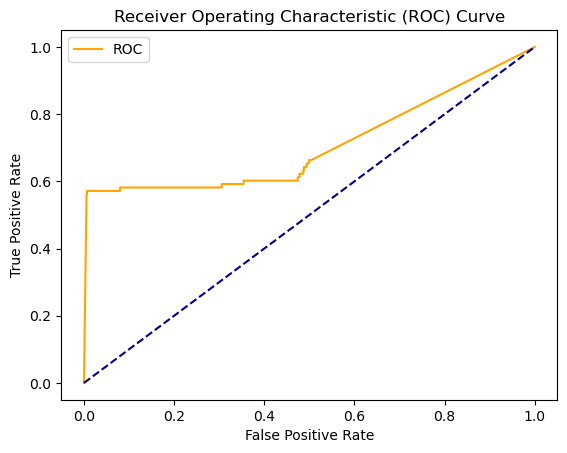

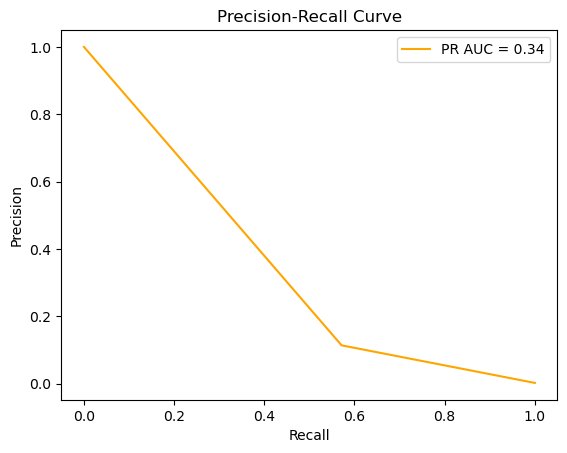

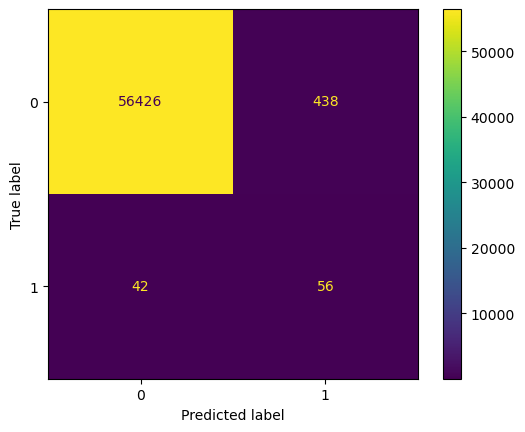

In [16]:
model_lgb = lgb.LGBMClassifier()

model_lgb, recall_lgb, f1_score_lgb, accuracy_lgb, roc_auc_lgb, pr_auc_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

In [17]:
print(recall_lgb)

0.5714285714285714


## LightGBM + SMOTE

[LightGBM] [Info] Number of positive: 227451, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052213 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454902, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0    0.99979   0.99884   0.99931     56864
           1    0.56579   0.87755   0.68800        98

    accuracy                        0.99863     56962
   macro avg    0.78279   0.93820   0.84366     56962
weighted avg    0.99904   0.99863   0.99878     56962

Recall = 	 0.87755
F1 Score  = 0.6880000000000001
Accuracy = 0.9986306660580738
ROC Area under Curve = 0.9381951781838227
Area under Precision-Recall Curve = 0.7217755804263352
Time taken = 4.052516460418701


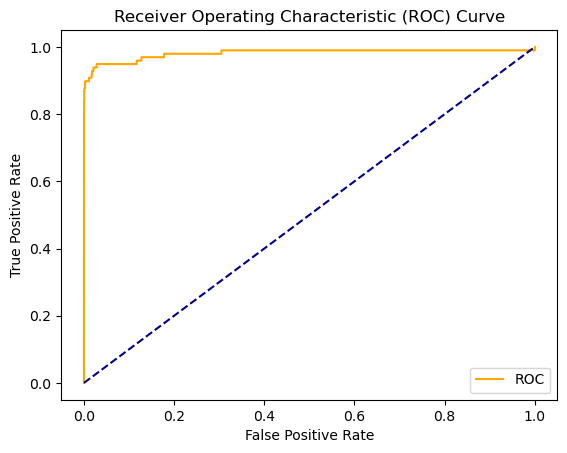

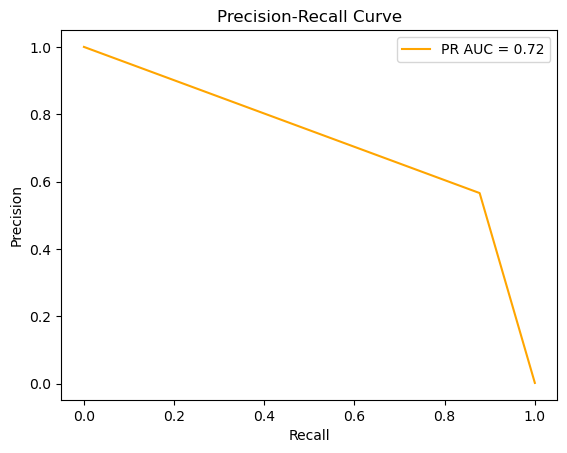

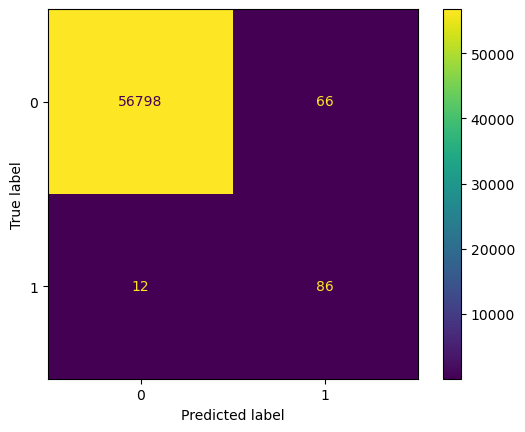

In [18]:
model_lgbsmt, recall_lgbsmt, f1_score_lgbsmt, accuracy_lgbsmt, roc_auc_lgbsmt, pr_auc_lgbsmt, tt_lgbsmt= run_model(model_lgb, X_train_smt, y_train_smt, X_test, y_test)

## KNN

              precision    recall  f1-score   support

           0    0.99956   0.99995   0.99975     56864
           1    0.96053   0.74490   0.83908        98

    accuracy                        0.99951     56962
   macro avg    0.98004   0.87242   0.91942     56962
weighted avg    0.99949   0.99951   0.99948     56962

Recall = 	 0.74490
F1 Score  = 0.839080459770115
Accuracy = 0.9995084442259752
ROC Area under Curve = 0.8724226008636431
Area under Precision-Recall Curve = 0.8529315820285489
Time taken = 21.816335916519165


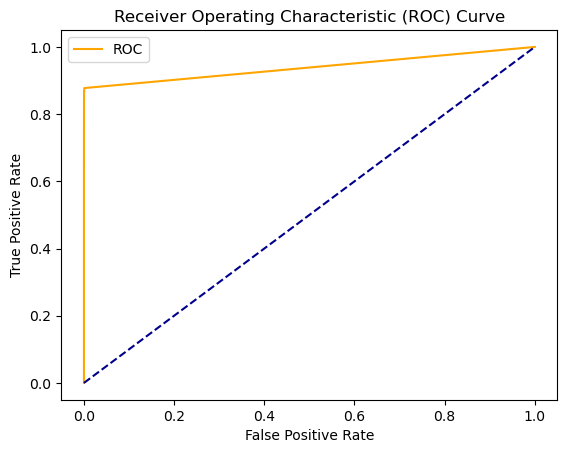

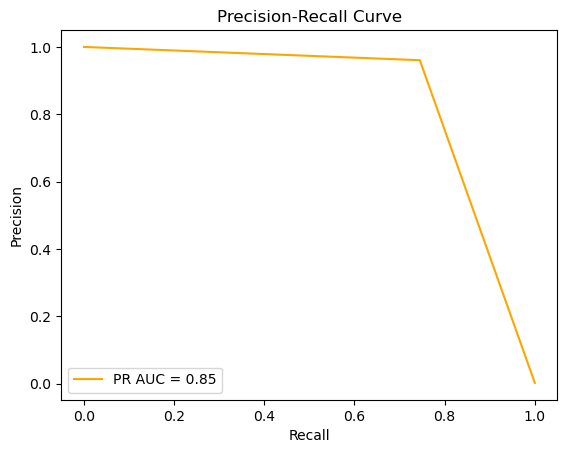

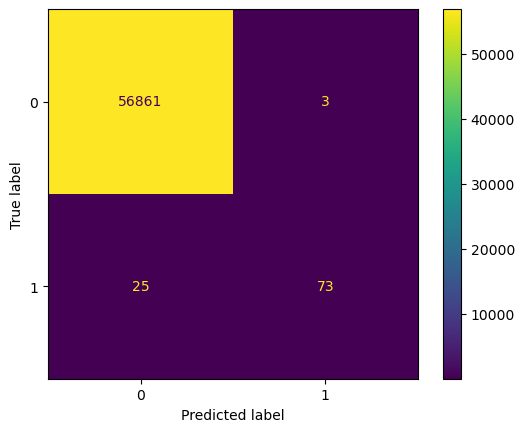

In [19]:
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

knn_clf, recall_knn, f1_score_knn, accuracy_knn, roc_auc_knn, pr_auc_knn, tt_knn = run_model(knn_clf, X_train, y_train, X_test, y_test)

## KNN +SMOTE

              precision    recall  f1-score   support

           0    0.99975   0.99852   0.99914     56864
           1    0.50000   0.85714   0.63158        98

    accuracy                        0.99828     56962
   macro avg    0.74988   0.92783   0.81536     56962
weighted avg    0.99889   0.99828   0.99851     56962

Recall = 	 0.85714
F1 Score  = 0.631578947368421
Accuracy = 0.9982795547909132
ROC Area under Curve = 0.9278328241820083
Area under Precision-Recall Curve = 0.6786943175149347
Time taken = 45.707048654556274


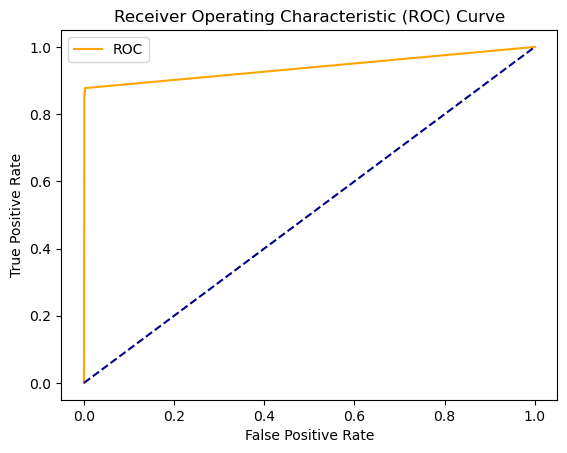

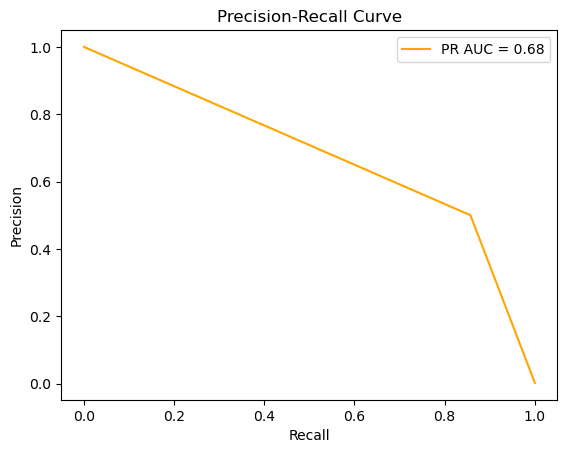

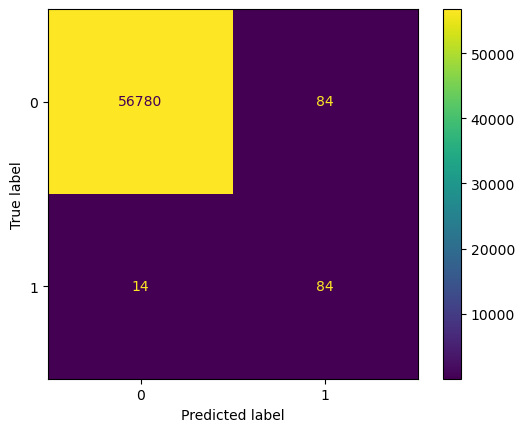

In [20]:
knnsmt_clf, recall_knnsmt, f1_score_knnsmt, accuracy_knnsmt, roc_auc_knnsmt, pr_auc_knnsmt, tt_knnsmt = run_model(knn_clf, X_train_smt, y_train_smt, X_test, y_test)

## LogisticRegression

              precision    recall  f1-score   support

           0    0.99928   0.99984   0.99956     56864
           1    0.86364   0.58163   0.69512        98

    accuracy                        0.99912     56962
   macro avg    0.93146   0.79074   0.84734     56962
weighted avg    0.99905   0.99912   0.99904     56962

Recall = 	 0.58163
F1 Score  = 0.6951219512195121
Accuracy = 0.9991222218320986
ROC Area under Curve = 0.7907371903460314
Area under Precision-Recall Curve = 0.7229943973976337
Time taken = 5.109622955322266


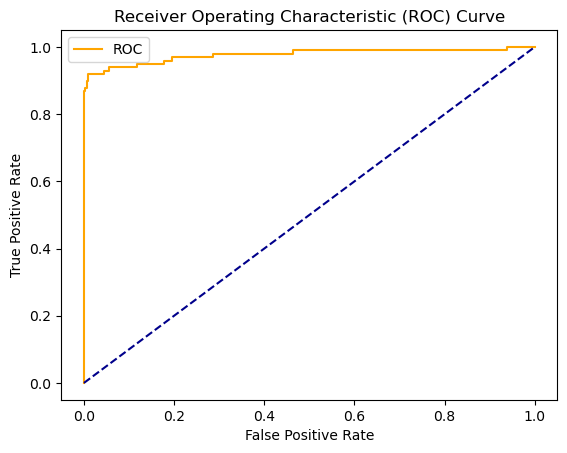

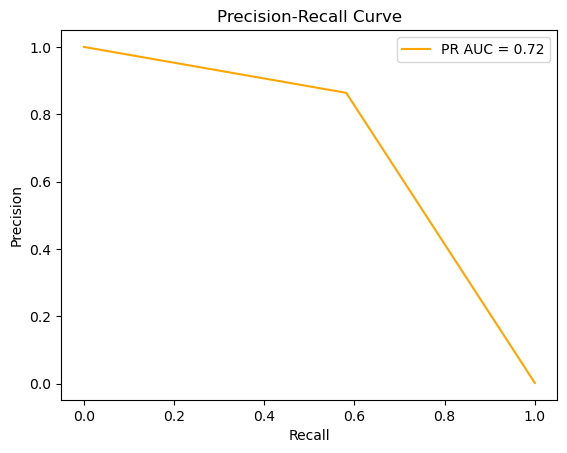

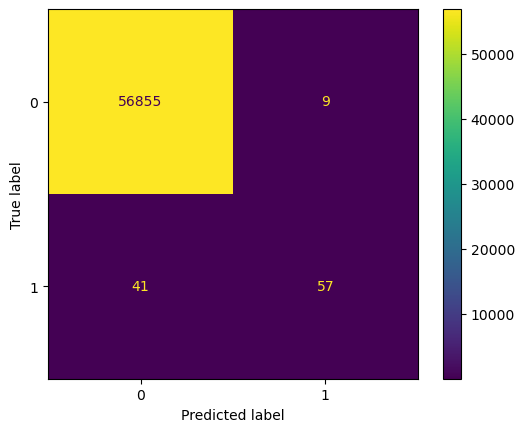

In [21]:
params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)

model_lr, recall_lr, f1_score_lr,accuracy_lr, roc_auc_lr, pr_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)
     

## LogisticRegression + SMOTE

              precision    recall  f1-score   support

           0    0.99986   0.97332   0.98641     56864
           1    0.05600   0.91837   0.10557        98

    accuracy                        0.97323     56962
   macro avg    0.52793   0.94584   0.54599     56962
weighted avg    0.99823   0.97323   0.98490     56962

Recall = 	 0.91837
F1 Score  = 0.10557184750733137
Accuracy = 0.9732277658790071
ROC Area under Curve = 0.9458448299128317
Area under Precision-Recall Curve = 0.487256384832963
Time taken = 11.2337064743042


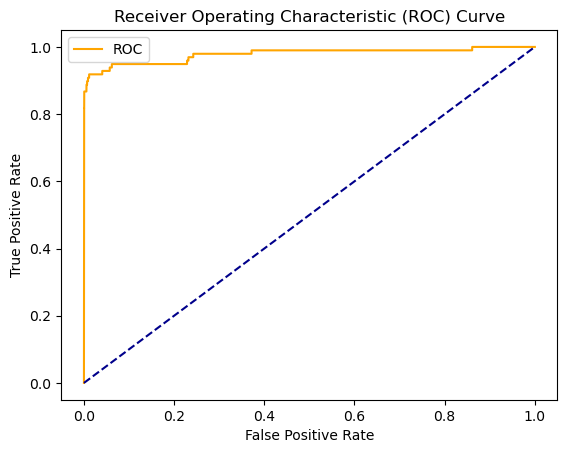

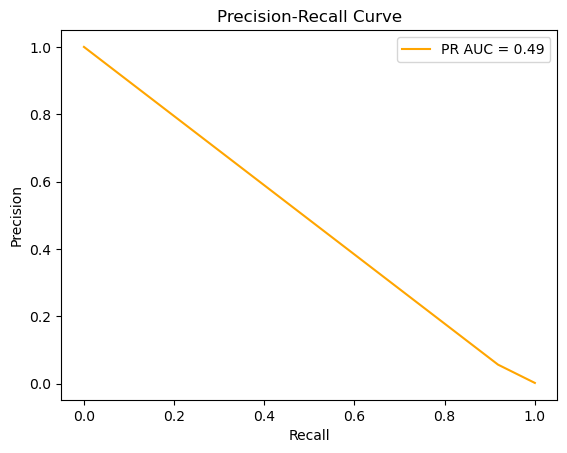

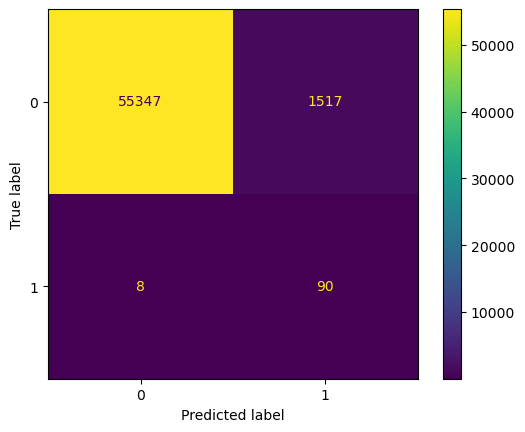

In [22]:
model_lrsmt, recall_lrsmt, f1_score_lrsmt,accuracy_lrsmt, roc_auc_lrsmt, pr_auc_lrsmt, tt_lrsmt = run_model(model_lr, X_train_smt, y_train_smt, X_test, y_test)

## RandomForest

              precision    recall  f1-score   support

           0    0.99963   0.99996   0.99980     56864
           1    0.97468   0.78571   0.87006        98

    accuracy                        0.99960     56962
   macro avg    0.98716   0.89284   0.93493     56962
weighted avg    0.99959   0.99960   0.99957     56962

Recall = 	 0.78571
F1 Score  = 0.8700564971751412
Accuracy = 0.9995962220427653
ROC Area under Curve = 0.892839557038347
Area under Precision-Recall Curve = 0.8803832484243008
Time taken = 538.0890445709229


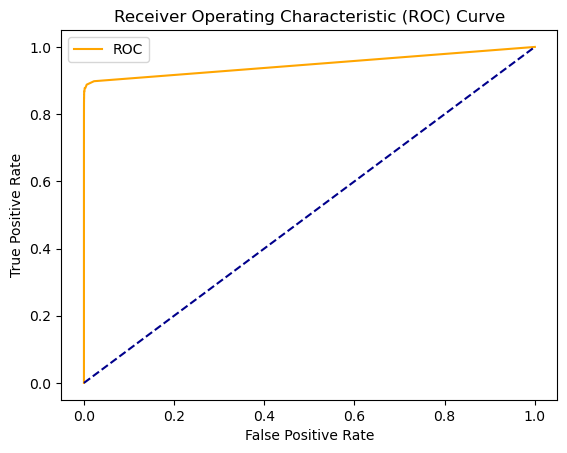

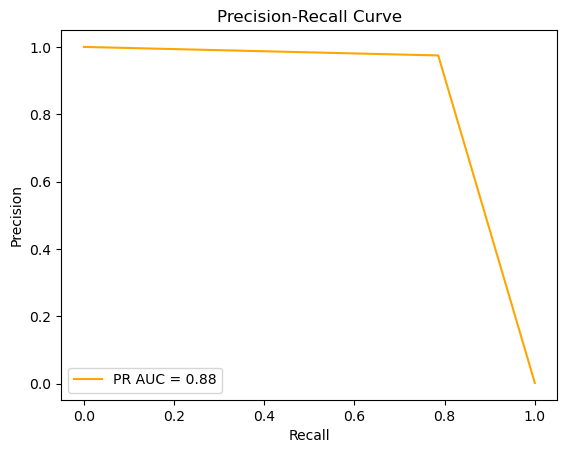

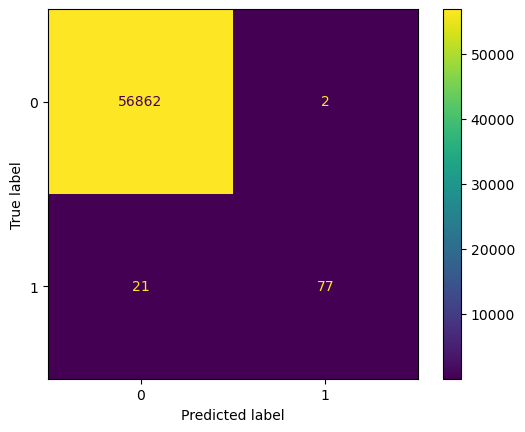

In [23]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf, recall_rf, f1_score_rf,accuracy_rf, roc_auc_rf, pr_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)
     

## RandomForest + SMOTE

              precision    recall  f1-score   support

           0    0.99972   0.99982   0.99977     56864
           1    0.89130   0.83673   0.86316        98

    accuracy                        0.99954     56962
   macro avg    0.94551   0.91828   0.93146     56962
weighted avg    0.99953   0.99954   0.99954     56962

Recall = 	 0.83673
F1 Score  = 0.8631578947368421
Accuracy = 0.9995435553526912
ROC Area under Curve = 0.9182794178447969
Area under Precision-Recall Curve = 0.8641599653586832
Time taken = 917.4578320980072


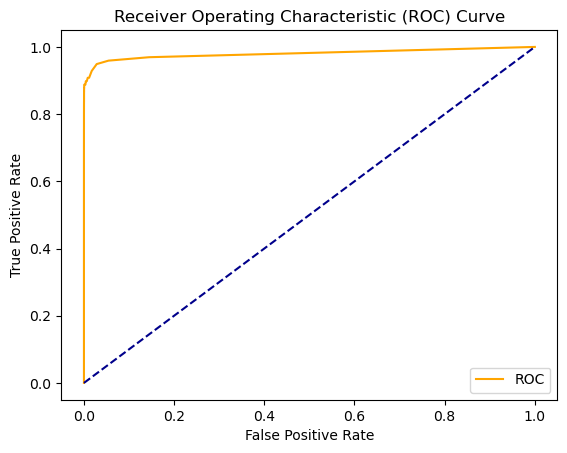

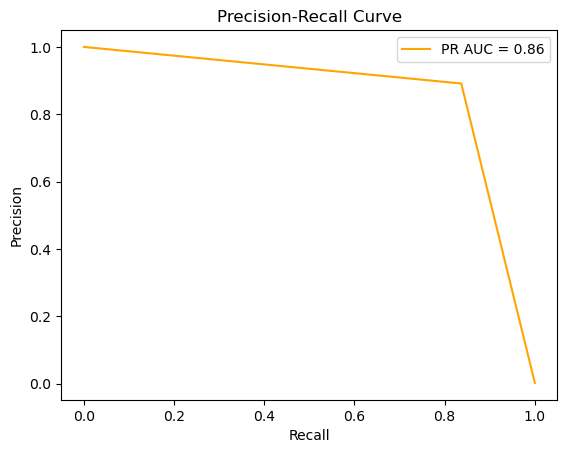

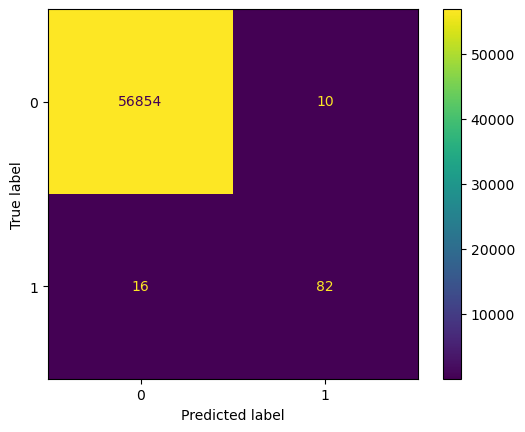

In [24]:
model_rfsmt, recall_rfsmt, f1_score_rfsmt, accuracy_rfsmt, roc_auc_rfsmt, pr_auc_rfsmt, tt_rfsmt = run_model(model_rf, X_train_smt, y_train_smt, X_test, y_test)
     

### DecisionTree 

              precision    recall  f1-score   support

           0    0.99965   0.99974   0.99969     56864
           1    0.83871   0.79592   0.81675        98

    accuracy                        0.99939     56962
   macro avg    0.91918   0.89783   0.90822     56962
weighted avg    0.99937   0.99939   0.99938     56962

Recall = 	 0.79592
F1 Score  = 0.8167539267015708
Accuracy = 0.999385555282469
ROC Area under Curve = 0.8978272900325014
Area under Precision-Recall Curve = 0.8174895780167272
Time taken = 5.325284004211426


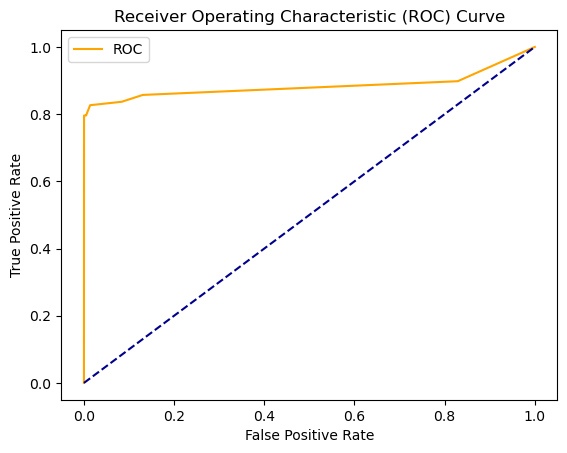

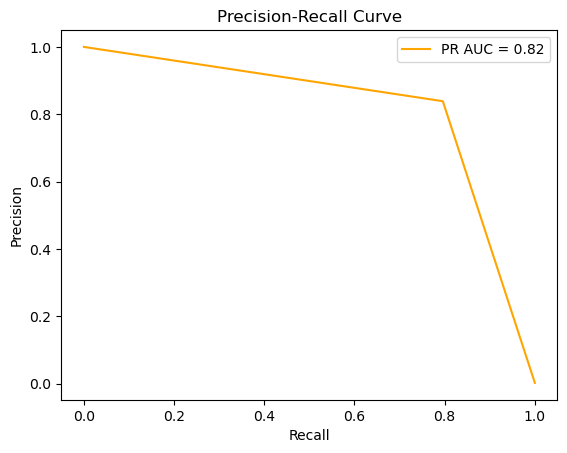

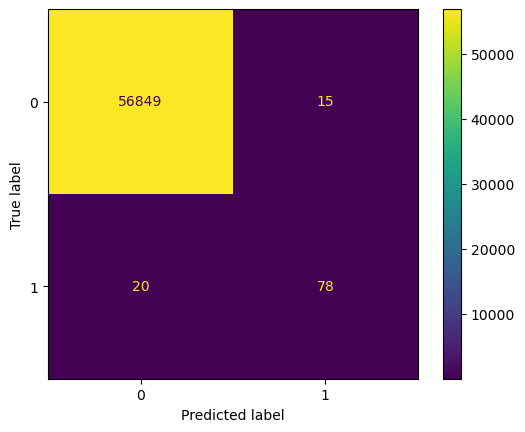

In [25]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, recall_dt, f1_score_dt, accuracy_dt, roc_auc_dt, pr_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test,y_test)

### DecisionTree + SMOTE

              precision    recall  f1-score   support

           0    0.99965   0.99409   0.99686     56864
           1    0.18841   0.79592   0.30469        98

    accuracy                        0.99375     56962
   macro avg    0.59403   0.89500   0.65077     56962
weighted avg    0.99825   0.99375   0.99567     56962

Recall = 	 0.79592
F1 Score  = 0.3046875
Accuracy = 0.993750219444542
ROC Area under Curve = 0.8950047661157878
Area under Precision-Recall Curve = 0.4923376378577743
Time taken = 10.477622985839844


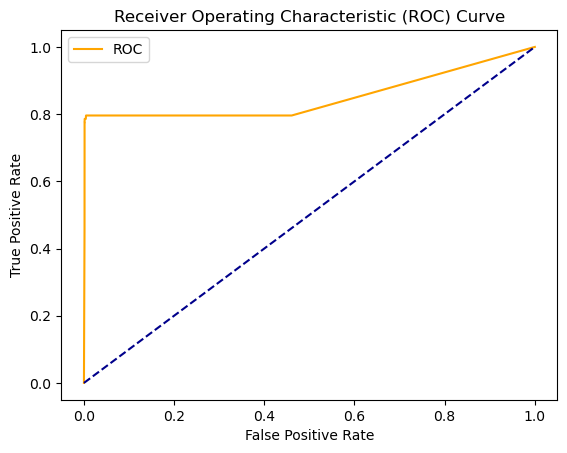

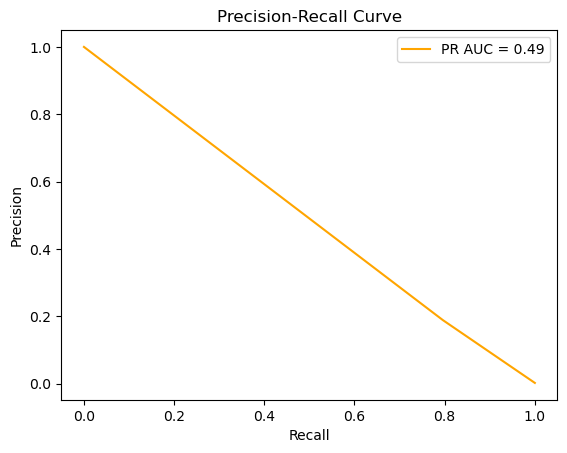

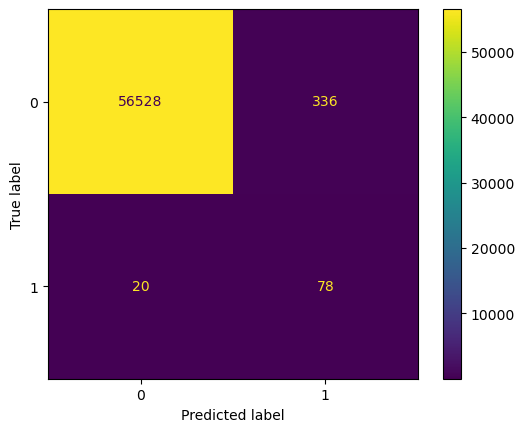

In [26]:
model_dtsmt, recall_dtsmt, f1_score_dtsmt, accuracy_dtsmt, roc_auc_dtsmt, pr_auc_dtsmt, tt_dtsmt = run_model(model_dt, X_train_smt, y_train_smt, X_test,y_test)

### XGBoost

              precision    recall  f1-score   support

           0    0.99960   0.99993   0.99976     56864
           1    0.94937   0.76531   0.84746        98

    accuracy                        0.99953     56962
   macro avg    0.97448   0.88262   0.92361     56962
weighted avg    0.99951   0.99953   0.99950     56962

Recall = 	 0.76531
F1 Score  = 0.8474576271186441
Accuracy = 0.9995259997893332
ROC Area under Curve = 0.8826178895868984
Area under Precision-Recall Curve = 0.8575384945069046
Time taken = 0.6928215026855469


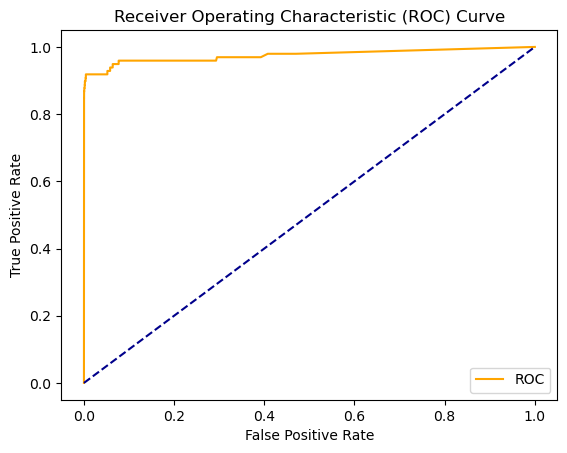

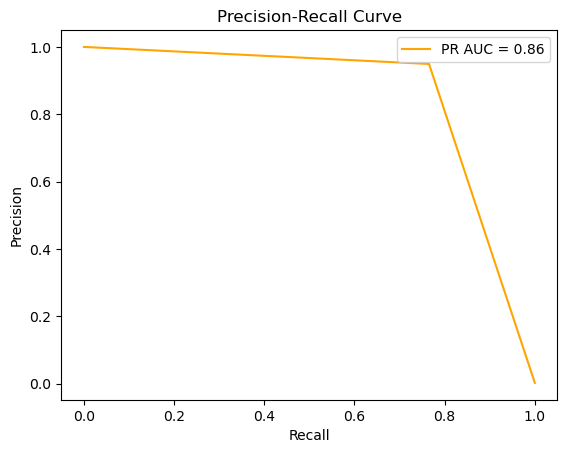

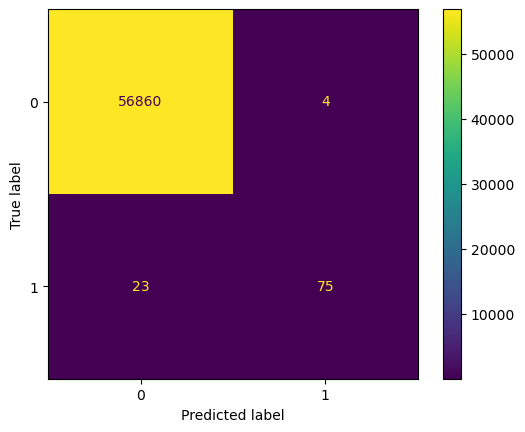

In [27]:
params_xgb ={'n_estimators': 20,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, recall_xgb, f1_score_xgb, accuracy_xgb, roc_auc_xgb, pr_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)
     

### XGBoost + SMOTE

              precision    recall  f1-score   support

           0    0.99972   0.99958   0.99965     56864
           1    0.77358   0.83673   0.80392        98

    accuracy                        0.99930     56962
   macro avg    0.88665   0.91816   0.90178     56962
weighted avg    0.99933   0.99930   0.99931     56962

Recall = 	 0.83673
F1 Score  = 0.803921568627451
Accuracy = 0.9992977774656788
ROC Area under Curve = 0.9181563171132269
Area under Precision-Recall Curve = 0.8053002442758285
Time taken = 2.444234609603882


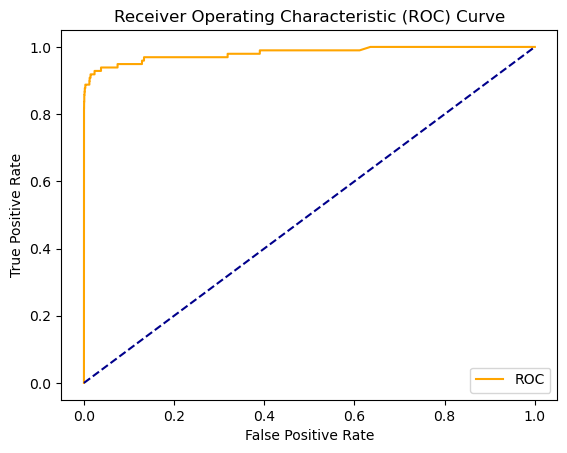

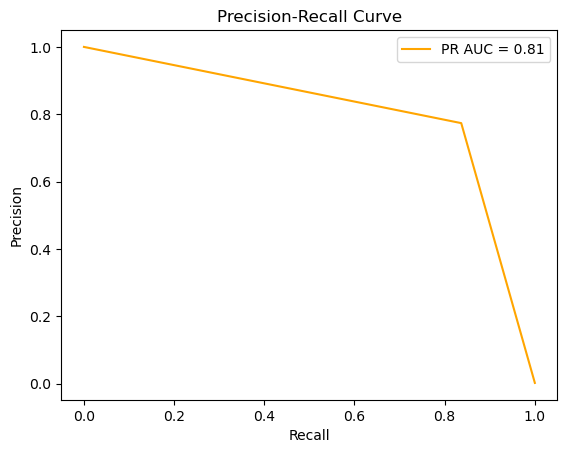

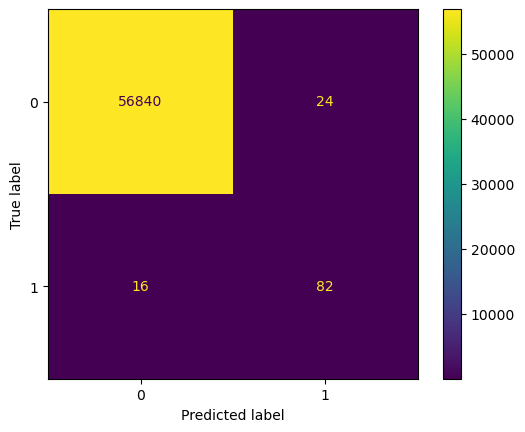

In [28]:
model_xgbsmt, recall_xgbsmt, f1_score_xgbsmt, accuracy_xgbsmt, roc_auc_xgbsmt, pr_auc_xgbsmt, tt_xgbsmt = run_model(model_xgb, X_train_smt, y_train_smt, X_test, y_test)


### CatBoost

Learning rate set to 0.5
0:	learn: 0.0369020	total: 6.36s	remaining: 2m
1:	learn: 0.0080196	total: 12.8s	remaining: 1m 55s
2:	learn: 0.0046350	total: 18.8s	remaining: 1m 46s
3:	learn: 0.0035516	total: 24.6s	remaining: 1m 38s
4:	learn: 0.0027589	total: 30.6s	remaining: 1m 31s
5:	learn: 0.0022880	total: 36.4s	remaining: 1m 24s
6:	learn: 0.0019234	total: 42.3s	remaining: 1m 18s
7:	learn: 0.0016352	total: 48s	remaining: 1m 12s
8:	learn: 0.0014243	total: 53.9s	remaining: 1m 5s
9:	learn: 0.0012724	total: 59.8s	remaining: 59.8s
10:	learn: 0.0010896	total: 1m 5s	remaining: 53.4s
11:	learn: 0.0009375	total: 1m 10s	remaining: 47.2s
12:	learn: 0.0008584	total: 1m 16s	remaining: 41s
13:	learn: 0.0007711	total: 1m 21s	remaining: 34.9s
14:	learn: 0.0006864	total: 1m 27s	remaining: 29s
15:	learn: 0.0006189	total: 1m 32s	remaining: 23.1s
16:	learn: 0.0005767	total: 1m 37s	remaining: 17.3s
17:	learn: 0.0005236	total: 1m 43s	remaining: 11.5s
18:	learn: 0.0004846	total: 1m 48s	remaining: 5.73s
19:	learn:

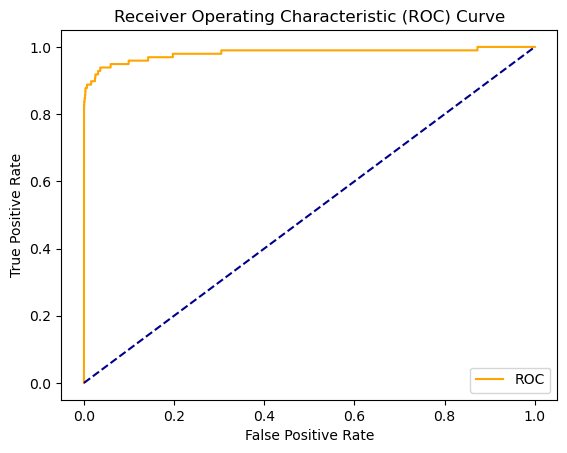

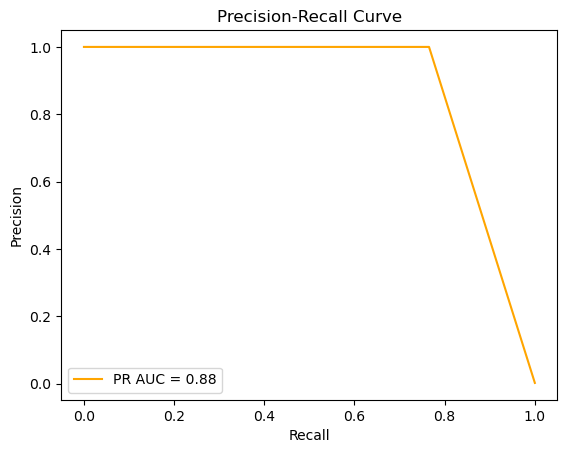

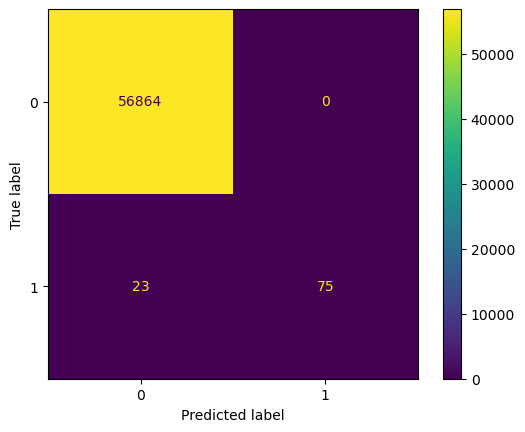

In [29]:
params_cb ={'iterations': 20,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, recall_cb, f1_score_cb, accuracy_cb, roc_auc_cb , pr_auc_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test)

### CatBoost + SMOTE

Learning rate set to 0.5
0:	learn: 0.0975298	total: 5.68s	remaining: 1m 47s
1:	learn: 0.0363889	total: 11.4s	remaining: 1m 42s
2:	learn: 0.0194832	total: 17.3s	remaining: 1m 38s
3:	learn: 0.0124032	total: 23s	remaining: 1m 32s
4:	learn: 0.0083280	total: 28.6s	remaining: 1m 25s
5:	learn: 0.0062781	total: 34.2s	remaining: 1m 19s
6:	learn: 0.0048889	total: 39.8s	remaining: 1m 13s
7:	learn: 0.0039153	total: 45.4s	remaining: 1m 8s
8:	learn: 0.0029614	total: 51s	remaining: 1m 2s
9:	learn: 0.0025821	total: 56.4s	remaining: 56.4s
10:	learn: 0.0021710	total: 1m 2s	remaining: 50.7s
11:	learn: 0.0018192	total: 1m 7s	remaining: 45.1s
12:	learn: 0.0016379	total: 1m 13s	remaining: 39.3s
13:	learn: 0.0014651	total: 1m 18s	remaining: 33.7s
14:	learn: 0.0013165	total: 1m 24s	remaining: 28.1s
15:	learn: 0.0011150	total: 1m 29s	remaining: 22.5s
16:	learn: 0.0009916	total: 1m 35s	remaining: 16.9s
17:	learn: 0.0009430	total: 1m 41s	remaining: 11.2s
18:	learn: 0.0008855	total: 1m 46s	remaining: 5.61s
19:	le

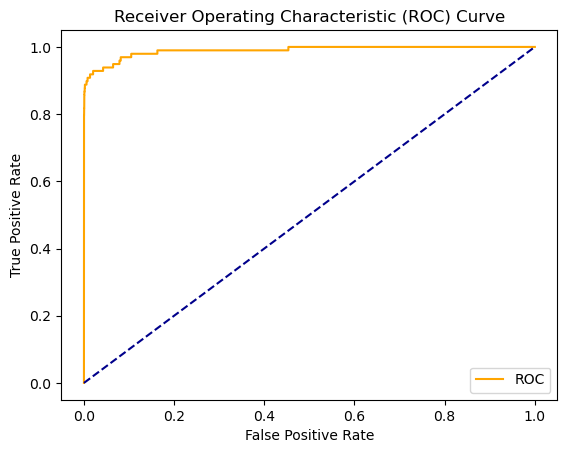

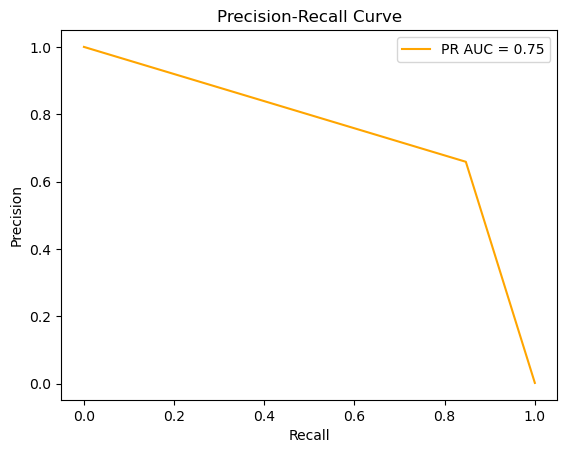

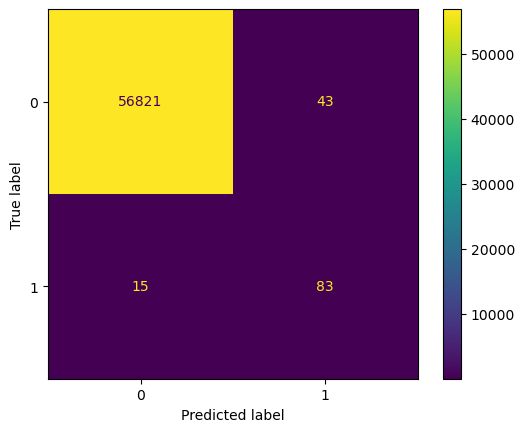

In [30]:
model_cbsmt, recall_cbsmt, f1_score_cbsmt, accuracy_cbsmt, roc_auc_cbsmt , pr_auc_cbsmt, tt_cbsmt= run_model(model_cb, X_train_smt, y_train_smt, X_test, y_test)

### Adaboost 

              precision    recall  f1-score   support

           0    0.99953   0.99986   0.99969     56864
           1    0.89873   0.72449   0.80226        98

    accuracy                        0.99939     56962
   macro avg    0.94913   0.86217   0.90098     56962
weighted avg    0.99935   0.99939   0.99935     56962

Recall = 	 0.72449
F1 Score  = 0.8022598870056498
Accuracy = 0.999385555282469
ROC Area under Curve = 0.8621745546840007
Area under Precision-Recall Curve = 0.8118489866721119
Time taken = 259.86041021347046


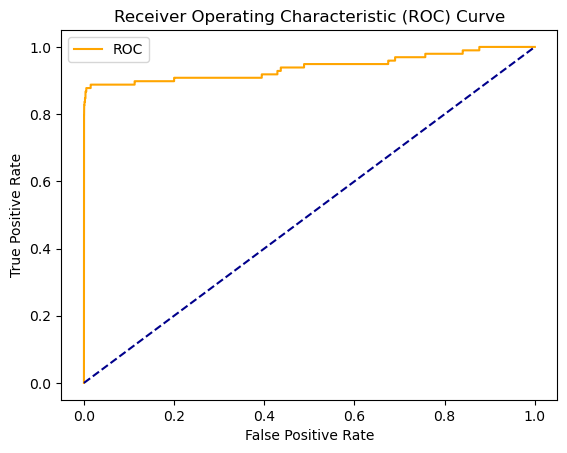

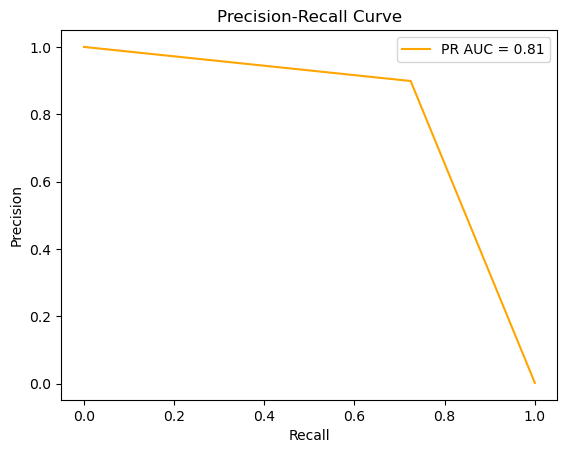

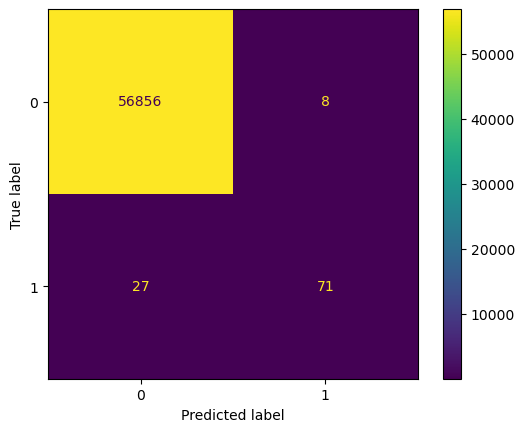

In [31]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),
                                  n_estimators=50,
                                  algorithm="SAMME.R",
                                  learning_rate=0.5)
model_ada, recall_ada, f1_score_ada, accuracy_ada, roc_auc_ada, pr_auc_ada, tt_ada = run_model(model_ada, X_train, y_train, X_test, y_test)

### Adaboost + SMOTE

              precision    recall  f1-score   support

           0    0.99979   0.98876   0.99424     56864
           1    0.11862   0.87755   0.20899        98

    accuracy                        0.98857     56962
   macro avg    0.55920   0.93316   0.60162     56962
weighted avg    0.99827   0.98857   0.99289     56962

Recall = 	 0.87755
F1 Score  = 0.20899149453219928
Accuracy = 0.9885713282539237
ROC Area under Curve = 0.933156841098848
Area under Precision-Recall Curve = 0.49819118841181603
Time taken = 556.0400559902191


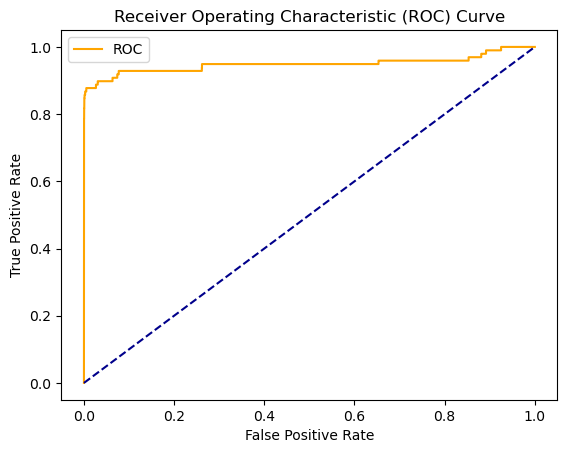

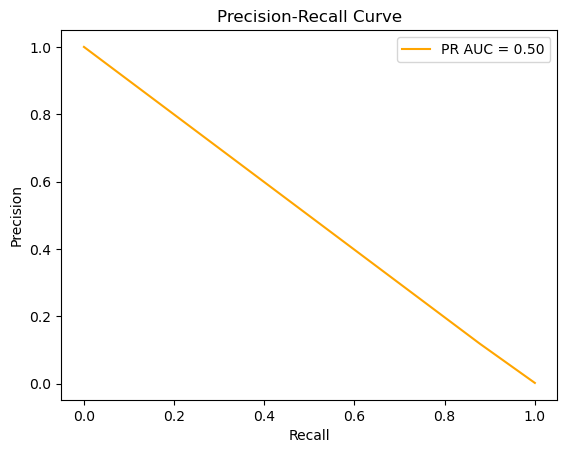

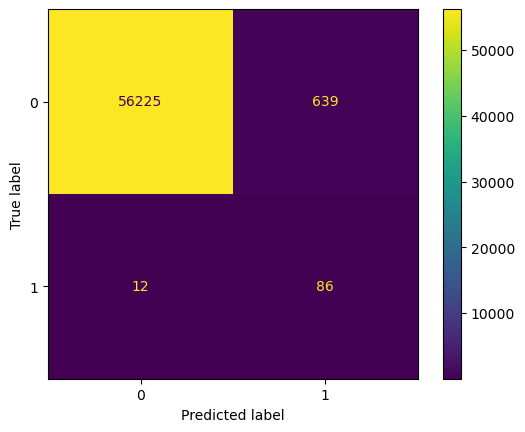

In [32]:
model_adasmt, recall_adasmt, f1_score_adasmt, accuracy_adasmt, roc_auc_adasmt, pr_auc_adasmt, tt_adasmt = run_model(model_ada, X_train_smt, y_train_smt, X_test, y_test)

## SVC

In [33]:
model1 = SVC(C= 10, kernel= 'rbf', random_state= 0)
model1.fit(X_train, y_train)
y_pred_svm = model1.predict(X_test)
print("Accuracy :",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score:",metrics.f1_score(y_test, y_pred_svm))

roc_auc = roc_auc_score(y_test, y_pred_svm)
print("ROC-AUC:", roc_auc)

pr_auc = average_precision_score(y_test, y_pred_svm)
print("PR AUC:", pr_auc)

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


Accuracy : 0.999420666409185
Precision: 0.9710144927536232
Recall: 0.6836734693877551
F1 Score: 0.8023952095808383
ROC-AUC: 0.8418191488750817
PR AUC: 0.6644010695507596
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.68      0.80        98

    accuracy                           1.00     56962
   macro avg       0.99      0.84      0.90     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
[[56862     2]
 [   31    67]]


## SVC + SMOTE

In [34]:
model2 = SVC(C= 10, kernel= 'rbf', random_state= 0)
model2.fit(X_train_smt, y_train_smt)
y_pred_svm = model2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision:",metrics.precision_score(y_test, y_pred_svm))
print("Recall:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score: ",metrics.f1_score(y_test, y_pred_svm))

roc_auc = roc_auc_score(y_test, y_pred_svm)
print("ROC-AUC:", roc_auc)

pr_auc = average_precision_score(y_test, y_pred_svm)
print("PR AUC:", pr_auc)

print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Accuracy: 0.9861837716372318
Precision: 0.09230769230769231
Recall: 0.7959183673469388
F1 Score:  0.16542948038176036
ROC-AUC: 0.8912150221653096
PR AUC: 0.0738204990222626
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.09      0.80      0.17        98

    accuracy                           0.99     56962
   macro avg       0.55      0.89      0.58     56962
weighted avg       1.00      0.99      0.99     56962

Confusion Matrix:
[[56097   767]
 [   20    78]]


## Model Selection (SMOTE)

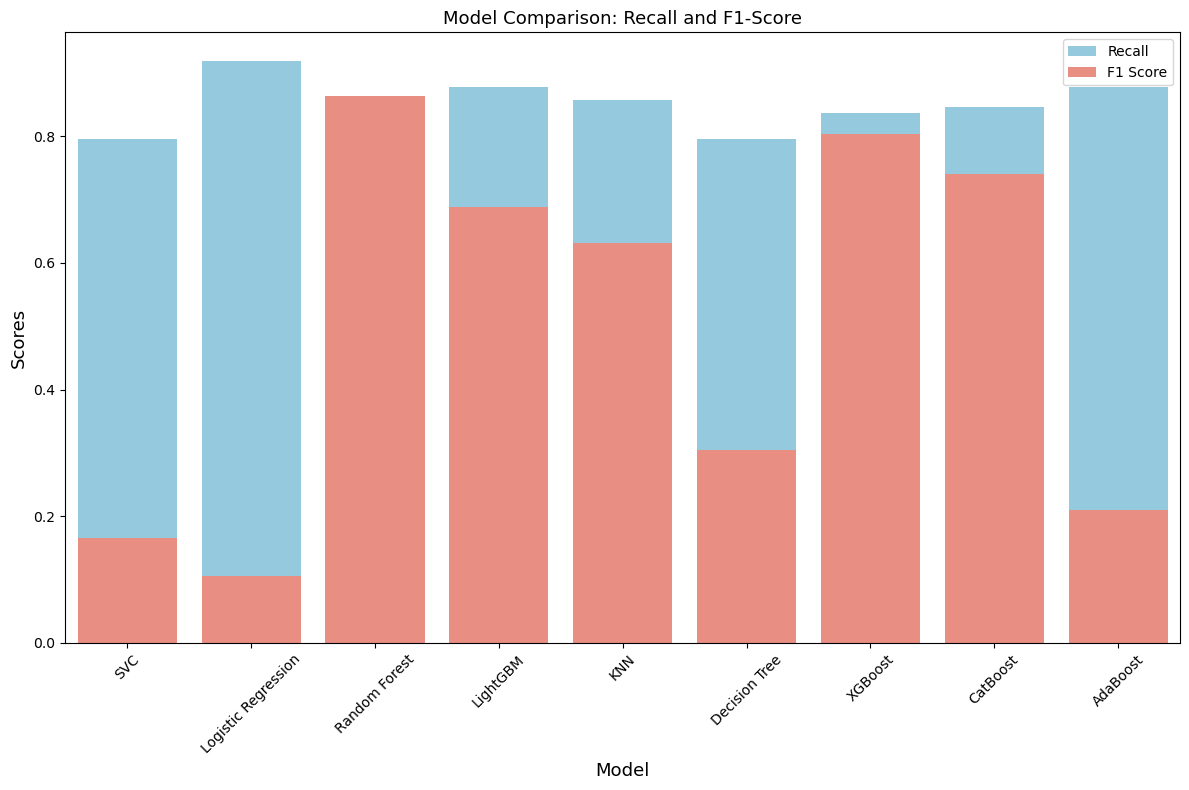

In [35]:
#accuracy_scores = [accuracy_score(y_test, y_pred_svm),accuracy_lrsmt, accuracy_rfsmt, accuracy_lgbsmt, accuracy_knn, accuracy_dtsmt, accuracy_xgbsmt, accuracy_cbsmt, accuracy_adasmt]
#roc_auc_scores = [roc_auc_lrsmt, roc_auc_rfsmt, roc_auc_lgbsmt, roc_auc_knn, roc_auc_dtsmt, roc_auc_xgbsmt, roc_auc_cbsmt, roc_auc_adasmt]
f1_scores = [f1_score(y_test, y_pred_svm),f1_score_lrsmt, f1_score_rfsmt, f1_score_lgbsmt, f1_score_knnsmt, f1_score_dtsmt, f1_score_xgbsmt, f1_score_cbsmt, f1_score_adasmt]
recall = [recall_score(y_test, y_pred_svm),recall_lrsmt, recall_rfsmt, recall_lgbsmt, recall_knnsmt, recall_dtsmt, recall_xgbsmt, recall_cbsmt, recall_adasmt]
#tt = [tt_svcsmt,tt_lrsmt, tt_rfsmt, tt_lgbsmt, tt_knn, tt_dtsmt, tt_xgbsmt, tt_cbsmt, tt_adasmt]

model_data = {'Model': ['SVC','Logistic Regression','Random Forest','LightGBM','KNN', 'Decision Tree', 'XGBoost', 'CatBoost', 'AdaBoost'],
              #'Accuracy': accuracy_scores,
              'Recall': recall,
              'F1 Score': f1_scores
             }
              #'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax = plt.subplots(figsize=(12, 8))

# Plot Recall
sns.barplot(x='Model', y='Recall', data=data, ax=ax, color='skyblue', label='Recall')

# Plot F1-Score
sns.barplot(x='Model', y='F1 Score', data=data, ax=ax, color='salmon', label='F1 Score')

ax.set_title('Model Comparison: Recall and F1-Score', fontsize=13)
ax.set_xlabel('Model', fontsize=13)
ax.set_ylabel('Scores', fontsize=13)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Hyperparameter Tuning (Optuna)

In [36]:
import optuna  # pip install optuna
import lightgbm as lgb
from sklearn.metrics import make_scorer

def objective(trial, X_train_smt, y_train_smt):
    max_depth=trial.suggest_int('max_depth',2,14)
    param_grid = {
        #         "device_type": trial.suggest_categorical("device_type", ['gpu']),
        #"n_estimators": trial.suggest_categorical("n_estimators", 1,300 ),
        "learning_rate": trial.suggest_float("learning_rate", 0.0001, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 4, 2**max_depth),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 5, 500),
        "max_bin": trial.suggest_int("max_bin", 10, 300),
        "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        "bagging_fraction": trial.suggest_float(
            "bagging_fraction", 0.2, 0.95, step=0.1
        ),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1)
    }


    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    model = lgb.LGBMClassifier(**param_grid)
    model.fit(X_train_smt,y_train_smt)
    scores = cross_val_score(model, X_train_smt, y_train_smt,
                             scoring=make_scorer(f1_score, average='weighted', labels=[1]),cv=cv, n_jobs=-1)
    return np.mean(scores)

### Luyện với nhiều trial để tìm ra bộ tham số tối ưu

In [37]:
study = optuna.create_study(direction='maximize')
func = lambda trial: objective(trial, X_train_smt, y_train_smt)
study.optimize(func, n_trials=100)

[I 2024-04-01 20:43:51,255] A new study created in memory with name: no-name-e7169c4f-0938-4843-8182-7a75e0219be3


[LightGBM] [Warning] min_data_in_leaf is set=361, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=361
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.062554503023962, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.062554503023962
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=361, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=361
[LightGBM] [Warning] feature_fraction is set=0.8

[I 2024-04-01 20:44:17,781] Trial 0 finished with value: 0.9987242223062991 and parameters: {'max_depth': 13, 'learning_rate': 0.24633236873536435, 'num_leaves': 4460, 'min_data_in_leaf': 361, 'max_bin': 177, 'lambda_l1': 40, 'lambda_l2': 75, 'min_gain_to_split': 1.062554503023962, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 0 with value: 0.9987242223062991.


[LightGBM] [Warning] min_data_in_leaf is set=194, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=194
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=9.874688401633243, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.874688401633243
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=194, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=194
[LightGBM] [Warnin

[I 2024-04-01 20:44:30,774] Trial 1 finished with value: 0.9726596490906033 and parameters: {'max_depth': 4, 'learning_rate': 0.06754151056299189, 'num_leaves': 9, 'min_data_in_leaf': 194, 'max_bin': 13, 'lambda_l1': 0, 'lambda_l2': 95, 'min_gain_to_split': 9.874688401633243, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 0 with value: 0.9987242223062991.


[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=0.1254780655964377, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1254780655964377
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] lambda_l2 is set=90, reg_lambda=0.0 will be ignored. Current value: lambda_l2=90
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=277, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=277
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-04-01 20:44:51,074] Trial 2 finished with value: 0.9879846205636236 and parameters: {'max_depth': 14, 'learning_rate': 0.057701801930486206, 'num_leaves': 7990, 'min_data_in_leaf': 277, 'max_bin': 240, 'lambda_l1': 50, 'lambda_l2': 90, 'min_gain_to_split': 0.1254780655964377, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 0 with value: 0.9987242223062991.


[LightGBM] [Warning] min_data_in_leaf is set=439, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=439
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=7.210294824304107, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.210294824304107
[LightGBM] [Warning] lambda_l1 is set=75, reg_alpha=0.0 will be ignored. Current value: lambda_l1=75
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=439, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=439
[LightGBM] [Warning] feature_fraction is set=0.5

[I 2024-04-01 20:45:07,169] Trial 3 finished with value: 0.9547691467760512 and parameters: {'max_depth': 14, 'learning_rate': 0.0005830958140225299, 'num_leaves': 5556, 'min_data_in_leaf': 439, 'max_bin': 153, 'lambda_l1': 75, 'lambda_l2': 55, 'min_gain_to_split': 7.210294824304107, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 0 with value: 0.9987242223062991.


[LightGBM] [Warning] min_data_in_leaf is set=494, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=494
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=2.808950992866141, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.808950992866141
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] lambda_l2 is set=95, reg_lambda=0.0 will be ignored. Current value: lambda_l2=95
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=494, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=494
[LightGBM] [Warning] feature_fraction is set=0.9

[I 2024-04-01 20:45:25,519] Trial 4 finished with value: 0.9942132588740156 and parameters: {'max_depth': 8, 'learning_rate': 0.04246585513553704, 'num_leaves': 189, 'min_data_in_leaf': 494, 'max_bin': 183, 'lambda_l1': 40, 'lambda_l2': 95, 'min_gain_to_split': 2.808950992866141, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 0 with value: 0.9987242223062991.


[LightGBM] [Warning] min_data_in_leaf is set=386, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=386
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=5.619717231021042, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.619717231021042
[LightGBM] [Warning] lambda_l1 is set=95, reg_alpha=0.0 will be ignored. Current value: lambda_l1=95
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=386, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=386
[LightGBM] [Warnin

[I 2024-04-01 20:45:39,285] Trial 5 finished with value: 0.9970779957290297 and parameters: {'max_depth': 14, 'learning_rate': 0.29991915335049507, 'num_leaves': 10203, 'min_data_in_leaf': 386, 'max_bin': 111, 'lambda_l1': 95, 'lambda_l2': 50, 'min_gain_to_split': 5.619717231021042, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 0 with value: 0.9987242223062991.


[LightGBM] [Warning] min_data_in_leaf is set=350, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=350
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=11.791482047110998, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.791482047110998
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=350, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=350
[LightGBM] [Warn

[I 2024-04-01 20:45:49,366] Trial 6 finished with value: 0.9447116023627007 and parameters: {'max_depth': 2, 'learning_rate': 0.03525325268611684, 'num_leaves': 4, 'min_data_in_leaf': 350, 'max_bin': 90, 'lambda_l1': 15, 'lambda_l2': 75, 'min_gain_to_split': 11.791482047110998, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 0 with value: 0.9987242223062991.


[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=5.548135293802468, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.548135293802468
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] f

[I 2024-04-01 20:45:57,943] Trial 7 finished with value: 0.9816076473288817 and parameters: {'max_depth': 2, 'learning_rate': 0.24656528324852353, 'num_leaves': 4, 'min_data_in_leaf': 91, 'max_bin': 69, 'lambda_l1': 5, 'lambda_l2': 85, 'min_gain_to_split': 5.548135293802468, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 0 with value: 0.9987242223062991.


[LightGBM] [Warning] min_data_in_leaf is set=282, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=282
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=14.558096608393306, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=14.558096608393306
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] lambda_l2 is set=75, reg_lambda=0.0 will be ignored. Current value: lambda_l2=75
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=282, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=282
[LightGBM] [Warning] feature_fraction is set

[I 2024-04-01 20:46:06,352] Trial 8 finished with value: 0.9710349469399817 and parameters: {'max_depth': 11, 'learning_rate': 0.2570301849957385, 'num_leaves': 680, 'min_data_in_leaf': 282, 'max_bin': 70, 'lambda_l1': 100, 'lambda_l2': 75, 'min_gain_to_split': 14.558096608393306, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 0 with value: 0.9987242223062991.


[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_gain_to_split is set=9.290547379074052, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=9.290547379074052
[LightGBM] [Warning] lambda_l1 is set=40, reg_alpha=0.0 will be ignored. Current value: lambda_l1=40
[LightGBM] [Warning] lambda_l2 is set=85, reg_lambda=0.0 will be ignored. Current value: lambda_l2=85
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111
[LightGBM] [Warnin

[I 2024-04-01 20:46:20,986] Trial 9 finished with value: 0.9959767502229756 and parameters: {'max_depth': 12, 'learning_rate': 0.2705470361825265, 'num_leaves': 3777, 'min_data_in_leaf': 111, 'max_bin': 128, 'lambda_l1': 40, 'lambda_l2': 85, 'min_gain_to_split': 9.290547379074052, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.2}. Best is trial 0 with value: 0.9987242223062991.


[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=0.20742667173120777, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.20742667173120777
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.9, co

[I 2024-04-01 20:46:43,919] Trial 10 finished with value: 0.9993760675221847 and parameters: {'max_depth': 8, 'learning_rate': 0.17568440833063714, 'num_leaves': 227, 'min_data_in_leaf': 8, 'max_bin': 291, 'lambda_l1': 25, 'lambda_l2': 15, 'min_gain_to_split': 0.20742667173120777, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 10 with value: 0.9993760675221847.


[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=1.043356154683298, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.043356154683298
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.9, colsam

[I 2024-04-01 20:47:04,603] Trial 11 finished with value: 0.9992136086002397 and parameters: {'max_depth': 8, 'learning_rate': 0.18216173438164787, 'num_leaves': 129, 'min_data_in_leaf': 8, 'max_bin': 298, 'lambda_l1': 25, 'lambda_l2': 10, 'min_gain_to_split': 1.043356154683298, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 10 with value: 0.9993760675221847.


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=3.0644492637782488, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.0644492637782488
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsam

[I 2024-04-01 20:47:24,116] Trial 12 finished with value: 0.9990862599628704 and parameters: {'max_depth': 8, 'learning_rate': 0.1610812279967864, 'num_leaves': 146, 'min_data_in_leaf': 5, 'max_bin': 283, 'lambda_l1': 20, 'lambda_l2': 0, 'min_gain_to_split': 3.0644492637782488, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 10 with value: 0.9993760675221847.


[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=2.7534729525103647, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.7534729525103647
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] feature_fraction is set=0.8, colsam

[I 2024-04-01 20:47:43,558] Trial 13 finished with value: 0.9986561570766584 and parameters: {'max_depth': 6, 'learning_rate': 0.1679372285103956, 'num_leaves': 45, 'min_data_in_leaf': 9, 'max_bin': 293, 'lambda_l1': 25, 'lambda_l2': 5, 'min_gain_to_split': 2.7534729525103647, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 10 with value: 0.9993760675221847.


[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.058282269778029194, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.058282269778029194
[LightGBM] [Warning] lambda_l1 is set=65, reg_alpha=0.0 will be ignored. Current value: lambda_l1=65
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] feature_fraction is s

[I 2024-04-01 20:48:04,242] Trial 14 finished with value: 0.9985636430836706 and parameters: {'max_depth': 10, 'learning_rate': 0.12266605566147726, 'num_leaves': 346, 'min_data_in_leaf': 102, 'max_bin': 235, 'lambda_l1': 65, 'lambda_l2': 20, 'min_gain_to_split': 0.058282269778029194, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 10 with value: 0.9993760675221847.


[LightGBM] [Warning] min_data_in_leaf is set=177, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=177
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=4.2205914660943575, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.2205914660943575
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=177, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=177
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-04-01 20:48:19,404] Trial 15 finished with value: 0.9983139131837746 and parameters: {'max_depth': 6, 'learning_rate': 0.19262187541861242, 'num_leaves': 42, 'min_data_in_leaf': 177, 'max_bin': 248, 'lambda_l1': 30, 'lambda_l2': 25, 'min_gain_to_split': 4.2205914660943575, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 10 with value: 0.9993760675221847.


[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=1.9373243364827315, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.9373243364827315
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2024-04-01 20:48:39,541] Trial 16 finished with value: 0.9993870625863599 and parameters: {'max_depth': 9, 'learning_rate': 0.1191892565288166, 'num_leaves': 291, 'min_data_in_leaf': 56, 'max_bin': 300, 'lambda_l1': 10, 'lambda_l2': 25, 'min_gain_to_split': 1.9373243364827315, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 16 with value: 0.9993870625863599.


[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=4.70943407435654, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.70943407435654
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=67, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=67
[LightGBM] [Warning] feature_fraction is set=0.5, cols

[I 2024-04-01 20:48:55,706] Trial 17 finished with value: 0.9991477055790867 and parameters: {'max_depth': 10, 'learning_rate': 0.11750673332647407, 'num_leaves': 429, 'min_data_in_leaf': 67, 'max_bin': 218, 'lambda_l1': 10, 'lambda_l2': 35, 'min_gain_to_split': 4.70943407435654, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 16 with value: 0.9993870625863599.


[LightGBM] [Warning] min_data_in_leaf is set=174, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=174
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=7.246771731854264, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.246771731854264
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=174, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=174
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2024-04-01 20:49:08,995] Trial 18 finished with value: 0.997718743928756 and parameters: {'max_depth': 6, 'learning_rate': 0.1125083032703503, 'num_leaves': 54, 'min_data_in_leaf': 174, 'max_bin': 264, 'lambda_l1': 60, 'lambda_l2': 35, 'min_gain_to_split': 7.246771731854264, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 16 with value: 0.9993870625863599.


[LightGBM] [Warning] min_data_in_leaf is set=223, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=223
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=1.8442821879773408, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.8442821879773408
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.2, subsample=1.0 will be ignored. Current value: bagging_fraction=0.2
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=223, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=223
[LightGBM] [Warnin

[I 2024-04-01 20:49:22,242] Trial 19 finished with value: 0.9989678151138959 and parameters: {'max_depth': 10, 'learning_rate': 0.20692340593671238, 'num_leaves': 363, 'min_data_in_leaf': 223, 'max_bin': 209, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 1.8442821879773408, 'bagging_fraction': 0.2, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 16 with value: 0.9993870625863599.


[LightGBM] [Warning] min_data_in_leaf is set=141, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=141
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=3.534286208408175, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.534286208408175
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=141, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=141
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2024-04-01 20:49:39,807] Trial 20 finished with value: 0.9947530861268602 and parameters: {'max_depth': 4, 'learning_rate': 0.09149517007755353, 'num_leaves': 15, 'min_data_in_leaf': 141, 'max_bin': 275, 'lambda_l1': 15, 'lambda_l2': 35, 'min_gain_to_split': 3.534286208408175, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 16 with value: 0.9993870625863599.


[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.5356653863238514, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5356653863238514
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-04-01 20:49:56,764] Trial 21 finished with value: 0.9990950019138362 and parameters: {'max_depth': 9, 'learning_rate': 0.20873417606323214, 'num_leaves': 234, 'min_data_in_leaf': 39, 'max_bin': 293, 'lambda_l1': 30, 'lambda_l2': 10, 'min_gain_to_split': 1.5356653863238514, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 16 with value: 0.9993870625863599.


[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=1.1638577000046748, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1638577000046748
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.7, 

[I 2024-04-01 20:50:15,585] Trial 22 finished with value: 0.9990313289307353 and parameters: {'max_depth': 7, 'learning_rate': 0.14748670327719385, 'num_leaves': 93, 'min_data_in_leaf': 53, 'max_bin': 299, 'lambda_l1': 25, 'lambda_l2': 25, 'min_gain_to_split': 1.1638577000046748, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 16 with value: 0.9993870625863599.


[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.13693883756794212, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.13693883756794212
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-04-01 20:50:36,238] Trial 23 finished with value: 0.9996000816610225 and parameters: {'max_depth': 8, 'learning_rate': 0.18219398135759732, 'num_leaves': 141, 'min_data_in_leaf': 35, 'max_bin': 261, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 0.13693883756794212, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 23 with value: 0.9996000816610225.


[LightGBM] [Warning] min_data_in_leaf is set=123, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=123
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.056990965929812676, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.056990965929812676
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=123, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=123
[LightGBM] [Warning] feature_fraction is set

[I 2024-04-01 20:51:00,075] Trial 24 finished with value: 0.9995890968278713 and parameters: {'max_depth': 9, 'learning_rate': 0.1384231805705845, 'num_leaves': 281, 'min_data_in_leaf': 123, 'max_bin': 255, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 0.056990965929812676, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 23 with value: 0.9996000816610225.


[LightGBM] [Warning] min_data_in_leaf is set=143, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=143
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=2.166918564586086, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.166918564586086
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=143, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=143
[LightGBM] [Warning]

[I 2024-04-01 20:51:20,854] Trial 25 finished with value: 0.9993585007452446 and parameters: {'max_depth': 11, 'learning_rate': 0.1422956836392225, 'num_leaves': 676, 'min_data_in_leaf': 143, 'max_bin': 216, 'lambda_l1': 10, 'lambda_l2': 0, 'min_gain_to_split': 2.166918564586086, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 23 with value: 0.9996000816610225.


[LightGBM] [Warning] min_data_in_leaf is set=133, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=133
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=3.9438366244119845, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.9438366244119845
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=133, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=133
[LightGBM] [Warning] feature_fraction is set=0.7, 

[I 2024-04-01 20:51:43,846] Trial 26 finished with value: 0.9996286278123339 and parameters: {'max_depth': 9, 'learning_rate': 0.09429767684257517, 'num_leaves': 294, 'min_data_in_leaf': 133, 'max_bin': 261, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 3.9438366244119845, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=238, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=238
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=4.29569760756528, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.29569760756528
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=238, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=238
[LightGBM] [Warning] feature_fraction is set=0.8, cols

[I 2024-04-01 20:52:04,667] Trial 27 finished with value: 0.9982765302191865 and parameters: {'max_depth': 7, 'learning_rate': 0.08450234543229355, 'num_leaves': 24, 'min_data_in_leaf': 238, 'max_bin': 258, 'lambda_l1': 0, 'lambda_l2': 0, 'min_gain_to_split': 4.29569760756528, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=137, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=137
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=5.107041154496228, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=5.107041154496228
[LightGBM] [Warning] lambda_l1 is set=85, reg_alpha=0.0 will be ignored. Current value: lambda_l1=85
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=137, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=137
[LightGBM] [Warning] feature_fraction is set=0.7

[I 2024-04-01 20:52:15,986] Trial 28 finished with value: 0.9971648183442209 and parameters: {'max_depth': 9, 'learning_rate': 0.2219981425146938, 'num_leaves': 285, 'min_data_in_leaf': 137, 'max_bin': 205, 'lambda_l1': 85, 'lambda_l2': 10, 'min_gain_to_split': 5.107041154496228, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=6.127344536603547, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.127344536603547
[LightGBM] [Warning] lambda_l1 is set=50, reg_alpha=0.0 will be ignored. Current value: lambda_l1=50
[LightGBM] [Warning] lambda_l2 is set=65, reg_lambda=0.0 will be ignored. Current value: lambda_l2=65
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=83, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=83
[LightGBM] [Warning] feature_fraction is set=0.8, co

[I 2024-04-01 20:52:31,515] Trial 29 finished with value: 0.9980785701392506 and parameters: {'max_depth': 12, 'learning_rate': 0.135388679609681, 'num_leaves': 1191, 'min_data_in_leaf': 83, 'max_bin': 180, 'lambda_l1': 50, 'lambda_l2': 65, 'min_gain_to_split': 6.127344536603547, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=205, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=205
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=8.796546942067998, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.796546942067998
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=205, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=205
[LightGBM] [Warning]

[I 2024-04-01 20:52:48,019] Trial 30 finished with value: 0.9971162486390476 and parameters: {'max_depth': 5, 'learning_rate': 0.08924651913763545, 'num_leaves': 25, 'min_data_in_leaf': 205, 'max_bin': 155, 'lambda_l1': 35, 'lambda_l2': 5, 'min_gain_to_split': 8.796546942067998, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.9798160855417324, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9798160855417324
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=53, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=53
[LightGBM] [Warning] feature_fraction is set=0.7, 

[I 2024-04-01 20:53:15,608] Trial 31 finished with value: 0.9994067989570606 and parameters: {'max_depth': 9, 'learning_rate': 0.10338433620221602, 'num_leaves': 303, 'min_data_in_leaf': 53, 'max_bin': 265, 'lambda_l1': 10, 'lambda_l2': 25, 'min_gain_to_split': 0.9798160855417324, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=130, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=130
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=1.1053941449489737, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1053941449489737
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=130, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=130
[LightGBM] [Warning] feature_fraction is set=0.7

[I 2024-04-01 20:53:38,515] Trial 32 finished with value: 0.9993870522625657 and parameters: {'max_depth': 7, 'learning_rate': 0.1056642927526647, 'num_leaves': 128, 'min_data_in_leaf': 130, 'max_bin': 270, 'lambda_l1': 5, 'lambda_l2': 20, 'min_gain_to_split': 1.1053941449489737, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.0845073080626823, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.0845073080626823
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] feature_fraction is set=0.7, 

[I 2024-04-01 20:54:02,528] Trial 33 finished with value: 0.9989300732653472 and parameters: {'max_depth': 9, 'learning_rate': 0.06355650281314987, 'num_leaves': 336, 'min_data_in_leaf': 42, 'max_bin': 232, 'lambda_l1': 15, 'lambda_l2': 40, 'min_gain_to_split': 0.0845073080626823, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=163, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=163
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=3.5643185488614177, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.5643185488614177
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=163, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=163
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-04-01 20:54:23,571] Trial 34 finished with value: 0.9994858714598724 and parameters: {'max_depth': 11, 'learning_rate': 0.0785597294503956, 'num_leaves': 512, 'min_data_in_leaf': 163, 'max_bin': 251, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 3.5643185488614177, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=265, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=265
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=4.041033758891276, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.041033758891276
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=265, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=265
[LightGBM] [Warning] feature_fraction is set=0.8, co

[I 2024-04-01 20:54:44,902] Trial 35 finished with value: 0.9969713142533353 and parameters: {'max_depth': 11, 'learning_rate': 0.024852553279849185, 'num_leaves': 521, 'min_data_in_leaf': 265, 'max_bin': 249, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 4.041033758891276, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=169, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=169
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=6.111895245554216, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.111895245554216
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=169, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=169
[LightGBM] [Warning]

[I 2024-04-01 20:54:59,270] Trial 36 finished with value: 0.9982914992049959 and parameters: {'max_depth': 12, 'learning_rate': 0.06951189608138787, 'num_leaves': 1047, 'min_data_in_leaf': 169, 'max_bin': 231, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 6.111895245554216, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=288, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=288
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=10.828509506568917, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=10.828509506568917
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=288, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=288
[LightGBM] [Warnin

[I 2024-04-01 20:55:17,923] Trial 37 finished with value: 0.9890314955288393 and parameters: {'max_depth': 13, 'learning_rate': 0.010927407177975246, 'num_leaves': 2007, 'min_data_in_leaf': 288, 'max_bin': 22, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 10.828509506568917, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=202, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=202
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=8.2930553159202, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=8.2930553159202
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=202, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=202
[LightGBM] [Warning] feature_fraction is set=0.9, cols

[I 2024-04-01 20:55:35,824] Trial 38 finished with value: 0.9981731301732661 and parameters: {'max_depth': 10, 'learning_rate': 0.07785584239835952, 'num_leaves': 493, 'min_data_in_leaf': 202, 'max_bin': 192, 'lambda_l1': 15, 'lambda_l2': 5, 'min_gain_to_split': 8.2930553159202, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=306, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=306
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=2.7235535133523743, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.7235535133523743
[LightGBM] [Warning] lambda_l1 is set=45, reg_alpha=0.0 will be ignored. Current value: lambda_l1=45
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=306, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=306
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-04-01 20:55:57,017] Trial 39 finished with value: 0.9968915870749757 and parameters: {'max_depth': 8, 'learning_rate': 0.05329346627130421, 'num_leaves': 83, 'min_data_in_leaf': 306, 'max_bin': 168, 'lambda_l1': 45, 'lambda_l2': 10, 'min_gain_to_split': 2.7235535133523743, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=6.490917030440595, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=6.490917030440595
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=102, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=102
[LightGBM] [Warning]

[I 2024-04-01 20:56:13,984] Trial 40 finished with value: 0.9989434094877154 and parameters: {'max_depth': 13, 'learning_rate': 0.1299792089523178, 'num_leaves': 1851, 'min_data_in_leaf': 102, 'max_bin': 250, 'lambda_l1': 20, 'lambda_l2': 0, 'min_gain_to_split': 6.490917030440595, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.6241135836240685, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6241135836240685
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] feature_fraction is set=0.7, co

[I 2024-04-01 20:56:38,529] Trial 41 finished with value: 0.9994924525800657 and parameters: {'max_depth': 9, 'learning_rate': 0.10076596444620672, 'num_leaves': 189, 'min_data_in_leaf': 78, 'max_bin': 274, 'lambda_l1': 5, 'lambda_l2': 20, 'min_gain_to_split': 0.6241135836240685, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=2.324147794325577, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.324147794325577
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=80, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=80
[LightGBM] [Warning] feature_fraction is set=0.7, cols

[I 2024-04-01 20:57:00,274] Trial 42 finished with value: 0.9994573175804282 and parameters: {'max_depth': 11, 'learning_rate': 0.15509179388211045, 'num_leaves': 610, 'min_data_in_leaf': 80, 'max_bin': 282, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 2.324147794325577, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=117, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=117
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.48601859187760166, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.48601859187760166
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=117, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=117
[LightGBM] [Warning] feature_fraction is set=0.8

[I 2024-04-01 20:57:23,049] Trial 43 finished with value: 0.998650970120553 and parameters: {'max_depth': 10, 'learning_rate': 0.03836381703282701, 'num_leaves': 194, 'min_data_in_leaf': 117, 'max_bin': 224, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 0.48601859187760166, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=149, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=149
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=3.434954155809143, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.434954155809143
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=55, reg_lambda=0.0 will be ignored. Current value: lambda_l2=55
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=149, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=149
[LightGBM] [Warning] feature_fraction is set=0.7

[I 2024-04-01 20:57:41,082] Trial 44 finished with value: 0.9987371523208244 and parameters: {'max_depth': 8, 'learning_rate': 0.10164124055898538, 'num_leaves': 154, 'min_data_in_leaf': 149, 'max_bin': 243, 'lambda_l1': 20, 'lambda_l2': 55, 'min_gain_to_split': 3.434954155809143, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=159, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=159
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=1.05349746774606, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.05349746774606
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=159, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=159
[LightGBM] [Warning] feature_fraction is set=0.9, co

[I 2024-04-01 20:58:10,726] Trial 45 finished with value: 0.9991060282266655 and parameters: {'max_depth': 7, 'learning_rate': 0.05724314266577816, 'num_leaves': 78, 'min_data_in_leaf': 159, 'max_bin': 275, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 1.05349746774606, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.4613941565717137, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.4613941565717137
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=100, reg_lambda=0.0 will be ignored. Current value: lambda_l2=100
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] feature_fraction is set=0.8

[I 2024-04-01 20:58:30,584] Trial 46 finished with value: 0.9993980419696207 and parameters: {'max_depth': 9, 'learning_rate': 0.18746811401983252, 'num_leaves': 190, 'min_data_in_leaf': 31, 'max_bin': 194, 'lambda_l1': 10, 'lambda_l2': 100, 'min_gain_to_split': 0.4613941565717137, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=490, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=490
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=13.735487685899635, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.735487685899635
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=490, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=490
[LightGBM] [Warning] feature_fraction is set=0.9

[I 2024-04-01 20:58:44,871] Trial 47 finished with value: 0.9974251318197828 and parameters: {'max_depth': 12, 'learning_rate': 0.1625369140416471, 'num_leaves': 818, 'min_data_in_leaf': 490, 'max_bin': 258, 'lambda_l1': 5, 'lambda_l2': 20, 'min_gain_to_split': 13.735487685899635, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=118, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=118
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=3.4492231718596473, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.4492231718596473
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=118, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=118
[LightGBM] [Warning] feature_fraction is set=0.7

[I 2024-04-01 20:59:02,820] Trial 48 finished with value: 0.9992267632159508 and parameters: {'max_depth': 11, 'learning_rate': 0.13422824452509582, 'num_leaves': 851, 'min_data_in_leaf': 118, 'max_bin': 129, 'lambda_l1': 15, 'lambda_l2': 0, 'min_gain_to_split': 3.4492231718596473, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=87
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=2.4571103385236848, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4571103385236848
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=87, min_child_samples=20 will be ignored. Current value: min_data_in_

[I 2024-04-01 20:59:23,469] Trial 49 finished with value: 0.9987634569009263 and parameters: {'max_depth': 8, 'learning_rate': 0.09597428787379753, 'num_leaves': 168, 'min_data_in_leaf': 87, 'max_bin': 285, 'lambda_l1': 20, 'lambda_l2': 5, 'min_gain_to_split': 2.4571103385236848, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=185, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=185
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=1.6264007646262437, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.6264007646262437
[LightGBM] [Warning] lambda_l1 is set=60, reg_alpha=0.0 will be ignored. Current value: lambda_l1=60
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=185, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=185
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-04-01 20:59:45,375] Trial 50 finished with value: 0.9979204623194242 and parameters: {'max_depth': 10, 'learning_rate': 0.07544151726707182, 'num_leaves': 413, 'min_data_in_leaf': 185, 'max_bin': 238, 'lambda_l1': 60, 'lambda_l2': 45, 'min_gain_to_split': 1.6264007646262437, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=2.152883560273632, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.152883560273632
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] feature_fraction is set=0.7, cols

[I 2024-04-01 21:00:04,658] Trial 51 finished with value: 0.9994595225052247 and parameters: {'max_depth': 11, 'learning_rate': 0.15133035053682178, 'num_leaves': 587, 'min_data_in_leaf': 71, 'max_bin': 282, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 2.152883560273632, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.5278786721111425, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5278786721111425
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.7, 

[I 2024-04-01 21:00:27,383] Trial 52 finished with value: 0.9995275856957451 and parameters: {'max_depth': 10, 'learning_rate': 0.16779013760805084, 'num_leaves': 225, 'min_data_in_leaf': 24, 'max_bin': 256, 'lambda_l1': 10, 'lambda_l2': 30, 'min_gain_to_split': 0.5278786721111425, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.7129684244461998, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7129684244461998
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=95, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=95
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-04-01 21:00:50,400] Trial 53 finished with value: 0.9994946562961047 and parameters: {'max_depth': 9, 'learning_rate': 0.16961140824236365, 'num_leaves': 221, 'min_data_in_leaf': 95, 'max_bin': 258, 'lambda_l1': 10, 'lambda_l2': 30, 'min_gain_to_split': 0.7129684244461998, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.7328884521664323, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7328884521664323
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] feature_fraction is set=0.7, 

[I 2024-04-01 21:01:08,548] Trial 54 finished with value: 0.9995210012956051 and parameters: {'max_depth': 9, 'learning_rate': 0.17437711312323512, 'num_leaves': 229, 'min_data_in_leaf': 26, 'max_bin': 265, 'lambda_l1': 10, 'lambda_l2': 30, 'min_gain_to_split': 0.7328884521664323, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.04983486293613271, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.04983486293613271
[LightGBM] [Warning] lambda_l1 is set=35, reg_alpha=0.0 will be ignored. Current value: lambda_l1=35
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] feature_fraction is set=0.8

[I 2024-04-01 21:01:29,152] Trial 55 finished with value: 0.9993123721695805 and parameters: {'max_depth': 8, 'learning_rate': 0.17648607493406096, 'num_leaves': 205, 'min_data_in_leaf': 23, 'max_bin': 264, 'lambda_l1': 35, 'lambda_l2': 30, 'min_gain_to_split': 0.04983486293613271, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=1.5459456764035888, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.5459456764035888
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2024-04-01 21:01:44,286] Trial 56 finished with value: 0.9993453429410554 and parameters: {'max_depth': 10, 'learning_rate': 0.22554068094833524, 'num_leaves': 243, 'min_data_in_leaf': 27, 'max_bin': 225, 'lambda_l1': 10, 'lambda_l2': 45, 'min_gain_to_split': 1.5459456764035888, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.712827008201819, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.712827008201819
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] f

[I 2024-04-01 21:02:01,888] Trial 57 finished with value: 0.9993343468610323 and parameters: {'max_depth': 9, 'learning_rate': 0.1953876973901766, 'num_leaves': 254, 'min_data_in_leaf': 60, 'max_bin': 256, 'lambda_l1': 20, 'lambda_l2': 30, 'min_gain_to_split': 0.712827008201819, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.661008254914171, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.661008254914171
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] feature_fraction is set=0.8

[I 2024-04-01 21:02:18,492] Trial 58 finished with value: 0.9992794723464178 and parameters: {'max_depth': 7, 'learning_rate': 0.1700867469084644, 'num_leaves': 95, 'min_data_in_leaf': 100, 'max_bin': 244, 'lambda_l1': 15, 'lambda_l2': 30, 'min_gain_to_split': 1.661008254914171, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=0.6486160237208508, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.6486160237208508
[LightGBM] [Warning] lambda_l1 is set=30, reg_alpha=0.0 will be ignored. Current value: lambda_l1=30
[LightGBM] [Warning] lambda_l2 is set=60, reg_lambda=0.0 will be ignored. Current value: lambda_l2=60
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.9, 

[I 2024-04-01 21:02:39,426] Trial 59 finished with value: 0.9992619144936304 and parameters: {'max_depth': 9, 'learning_rate': 0.2043168496801193, 'num_leaves': 274, 'min_data_in_leaf': 16, 'max_bin': 201, 'lambda_l1': 30, 'lambda_l2': 60, 'min_gain_to_split': 0.6486160237208508, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=1.506366137264158, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.506366137264158
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] lambda_l2 is set=70, reg_lambda=0.0 will be ignored. Current value: lambda_l2=70
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=42, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=42
[LightGBM] [Warning] feature_fraction is set=0.7, co

[I 2024-04-01 21:02:58,355] Trial 60 finished with value: 0.9991103994263006 and parameters: {'max_depth': 8, 'learning_rate': 0.22886284498813386, 'num_leaves': 210, 'min_data_in_leaf': 42, 'max_bin': 215, 'lambda_l1': 25, 'lambda_l2': 70, 'min_gain_to_split': 1.506366137264158, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.5554189643601266, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5554189643601266
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=78, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=78
[LightGBM] [Warning] feature_fraction is set=0.7, 

[I 2024-04-01 21:03:18,040] Trial 61 finished with value: 0.999485860407167 and parameters: {'max_depth': 9, 'learning_rate': 0.18384615044946104, 'num_leaves': 223, 'min_data_in_leaf': 78, 'max_bin': 273, 'lambda_l1': 10, 'lambda_l2': 40, 'min_gain_to_split': 0.5554189643601266, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=381, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=381
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.1213773724078887, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1213773724078887
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=381, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=381
[LightGBM] [Warn

[I 2024-04-01 21:03:38,963] Trial 62 finished with value: 0.9993409482073549 and parameters: {'max_depth': 10, 'learning_rate': 0.1443174401790925, 'num_leaves': 315, 'min_data_in_leaf': 381, 'max_bin': 263, 'lambda_l1': 15, 'lambda_l2': 20, 'min_gain_to_split': 0.1213773724078887, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=1.1143937349877886, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1143937349877886
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=60, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=60
[LightGBM] [Warning] feature_fraction is set=0.7, co

[I 2024-04-01 21:03:58,382] Trial 63 finished with value: 0.9995056244764061 and parameters: {'max_depth': 8, 'learning_rate': 0.16285075353010933, 'num_leaves': 162, 'min_data_in_leaf': 60, 'max_bin': 290, 'lambda_l1': 5, 'lambda_l2': 40, 'min_gain_to_split': 1.1143937349877886, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.1717151383575402, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.1717151383575402
[LightGBM] [Warning] lambda_l1 is set=80, reg_alpha=0.0 will be ignored. Current value: lambda_l1=80
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-04-01 21:04:14,883] Trial 64 finished with value: 0.9982541189655944 and parameters: {'max_depth': 8, 'learning_rate': 0.1600479229786447, 'num_leaves': 121, 'min_data_in_leaf': 48, 'max_bin': 286, 'lambda_l1': 80, 'lambda_l2': 40, 'min_gain_to_split': 1.1717151383575402, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=2.066705418462798, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.066705418462798
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=45, reg_lambda=0.0 will be ignored. Current value: lambda_l2=45
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.7, colsam

[I 2024-04-01 21:04:33,027] Trial 65 finished with value: 0.9991960741450508 and parameters: {'max_depth': 6, 'learning_rate': 0.17552620061127175, 'num_leaves': 41, 'min_data_in_leaf': 6, 'max_bin': 290, 'lambda_l1': 10, 'lambda_l2': 45, 'min_gain_to_split': 2.066705418462798, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=125, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=125
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=2.7825544873244437, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.7825544873244437
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=125, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=125
[LightGBM] [Warning] feature_fraction is set=0.4

[I 2024-04-01 21:04:50,223] Trial 66 finished with value: 0.9993124102046679 and parameters: {'max_depth': 7, 'learning_rate': 0.12565877259048508, 'num_leaves': 97, 'min_data_in_leaf': 125, 'max_bin': 300, 'lambda_l1': 0, 'lambda_l2': 50, 'min_gain_to_split': 2.7825544873244437, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.00994928457244057, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.00994928457244057
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=64, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=64
[LightGBM] [Warning] feature_fraction is set=0.8

[I 2024-04-01 21:05:10,195] Trial 67 finished with value: 0.9994682961428298 and parameters: {'max_depth': 10, 'learning_rate': 0.16612157311331627, 'num_leaves': 262, 'min_data_in_leaf': 64, 'max_bin': 239, 'lambda_l1': 15, 'lambda_l2': 35, 'min_gain_to_split': 0.00994928457244057, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=1.3105433679960172, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.3105433679960172
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=98, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=98
[LightGBM] [Warning] feature_fraction is set=0.7, co

[I 2024-04-01 21:05:27,823] Trial 68 finished with value: 0.9994375546692357 and parameters: {'max_depth': 8, 'learning_rate': 0.2025775228997161, 'num_leaves': 166, 'min_data_in_leaf': 98, 'max_bin': 258, 'lambda_l1': 5, 'lambda_l2': 30, 'min_gain_to_split': 1.3105433679960172, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=3.025151987434077, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.025151987434077
[LightGBM] [Warning] lambda_l1 is set=20, reg_alpha=0.0 will be ignored. Current value: lambda_l1=20
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] f

[I 2024-04-01 21:05:43,859] Trial 69 finished with value: 0.9990971406279924 and parameters: {'max_depth': 9, 'learning_rate': 0.2143122713053309, 'num_leaves': 217, 'min_data_in_leaf': 24, 'max_bin': 269, 'lambda_l1': 20, 'lambda_l2': 25, 'min_gain_to_split': 3.025151987434077, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.8720425880337401, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.8720425880337401
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-04-01 21:06:03,003] Trial 70 finished with value: 0.9992334091481372 and parameters: {'max_depth': 6, 'learning_rate': 0.18919486214996248, 'num_leaves': 32, 'min_data_in_leaf': 39, 'max_bin': 229, 'lambda_l1': 10, 'lambda_l2': 35, 'min_gain_to_split': 0.8720425880337401, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.5520212431968433, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.5520212431968433
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=30, reg_lambda=0.0 will be ignored. Current value: lambda_l2=30
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=62, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=62
[LightGBM] [Warning] feature_fraction is set=0.7, co

[I 2024-04-01 21:06:29,169] Trial 71 finished with value: 0.9994814674062547 and parameters: {'max_depth': 9, 'learning_rate': 0.1155246435150964, 'num_leaves': 171, 'min_data_in_leaf': 62, 'max_bin': 281, 'lambda_l1': 5, 'lambda_l2': 30, 'min_gain_to_split': 0.5520212431968433, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.8744606980745617, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.8744606980745617
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=20, reg_lambda=0.0 will be ignored. Current value: lambda_l2=20
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=111, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=111
[LightGBM] [Warning] feature_fraction is set=0.7

[I 2024-04-01 21:06:41,039] Trial 72 finished with value: 0.9818875676797016 and parameters: {'max_depth': 3, 'learning_rate': 0.13701990588590543, 'num_leaves': 5, 'min_data_in_leaf': 111, 'max_bin': 274, 'lambda_l1': 0, 'lambda_l2': 20, 'min_gain_to_split': 0.8744606980745617, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=1.7503048131652714, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.7503048131652714
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=40, reg_lambda=0.0 will be ignored. Current value: lambda_l2=40
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=84, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=84
[LightGBM] [Warning] feature_fraction is set=0.7, 

[I 2024-04-01 21:06:57,741] Trial 73 finished with value: 0.9993497183218711 and parameters: {'max_depth': 8, 'learning_rate': 0.15089505961328764, 'num_leaves': 177, 'min_data_in_leaf': 84, 'max_bin': 255, 'lambda_l1': 10, 'lambda_l2': 40, 'min_gain_to_split': 1.7503048131652714, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.4510323609143426, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.4510323609143426
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=70, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=70
[LightGBM] [Warning] feature_fraction is set=0.8, co

[I 2024-04-01 21:07:23,289] Trial 74 finished with value: 0.9995627403423949 and parameters: {'max_depth': 9, 'learning_rate': 0.15757633609643637, 'num_leaves': 233, 'min_data_in_leaf': 70, 'max_bin': 292, 'lambda_l1': 5, 'lambda_l2': 25, 'min_gain_to_split': 0.4510323609143426, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=2.4986453022751998, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=2.4986453022751998
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=35, reg_lambda=0.0 will be ignored. Current value: lambda_l2=35
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] feature_fraction is set=0.8, co

[I 2024-04-01 21:07:40,656] Trial 75 finished with value: 0.9994858592976659 and parameters: {'max_depth': 10, 'learning_rate': 0.17492006750080516, 'num_leaves': 335, 'min_data_in_leaf': 35, 'max_bin': 291, 'lambda_l1': 0, 'lambda_l2': 35, 'min_gain_to_split': 2.4986453022751998, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.3201429050965348, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.3201429050965348
[LightGBM] [Warning] lambda_l1 is set=100, reg_alpha=0.0 will be ignored. Current value: lambda_l1=100
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=91, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=91
[LightGBM] [Warning] feature_fraction is set=0.8

[I 2024-04-01 21:07:54,461] Trial 76 finished with value: 0.9974485124804543 and parameters: {'max_depth': 7, 'learning_rate': 0.1950527140179812, 'num_leaves': 102, 'min_data_in_leaf': 91, 'max_bin': 85, 'lambda_l1': 100, 'lambda_l2': 25, 'min_gain_to_split': 1.3201429050965348, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=1.9516146099552496, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.9516146099552496
[LightGBM] [Warning] lambda_l1 is set=15, reg_alpha=0.0 will be ignored. Current value: lambda_l1=15
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=54, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=54
[LightGBM] [Warning] feature_fraction is set=0.8, 

[I 2024-04-01 21:08:05,928] Trial 77 finished with value: 0.9990841001437827 and parameters: {'max_depth': 9, 'learning_rate': 0.23804465131984825, 'num_leaves': 238, 'min_data_in_leaf': 54, 'max_bin': 37, 'lambda_l1': 15, 'lambda_l2': 10, 'min_gain_to_split': 1.9516146099552496, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=337, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=337
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_gain_to_split is set=0.2871272453995086, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2871272453995086
[LightGBM] [Warning] lambda_l1 is set=90, reg_alpha=0.0 will be ignored. Current value: lambda_l1=90
[LightGBM] [Warning] lambda_l2 is set=50, reg_lambda=0.0 will be ignored. Current value: lambda_l2=50
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=337, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=337
[LightGBM] [Warning] feature_fraction is set=0

[I 2024-04-01 21:08:22,364] Trial 78 finished with value: 0.9980854487444859 and parameters: {'max_depth': 9, 'learning_rate': 0.1594474198260039, 'num_leaves': 287, 'min_data_in_leaf': 337, 'max_bin': 246, 'lambda_l1': 90, 'lambda_l2': 50, 'min_gain_to_split': 0.2871272453995086, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.9}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] feature_fraction is set=0.30000000000000004, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30000000000000004
[LightGBM] [Warning] min_gain_to_split is set=3.921525961155952, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=3.921525961155952
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=19, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=19
[LightGBM] [Warning] fea

[I 2024-04-01 21:08:38,071] Trial 79 finished with value: 0.9994441439946463 and parameters: {'max_depth': 8, 'learning_rate': 0.1814941214676462, 'num_leaves': 117, 'min_data_in_leaf': 19, 'max_bin': 265, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 3.921525961155952, 'bagging_fraction': 0.8, 'bagging_freq': 1, 'feature_fraction': 0.30000000000000004}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_gain_to_split is set=0.9502824223022771, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9502824223022771
[LightGBM] [Warning] lambda_l1 is set=25, reg_alpha=0.0 will be ignored. Current value: lambda_l1=25
[LightGBM] [Warning] lambda_l2 is set=25, reg_lambda=0.0 will be ignored. Current value: lambda_l2=25
[LightGBM] [Warning] bagging_fraction is set=0.30000000000000004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.30000000000000004
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=71, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=71
[LightGBM] [Warnin

[I 2024-04-01 21:08:52,137] Trial 80 finished with value: 0.9981863100243403 and parameters: {'max_depth': 10, 'learning_rate': 0.1408560875243775, 'num_leaves': 375, 'min_data_in_leaf': 71, 'max_bin': 294, 'lambda_l1': 25, 'lambda_l2': 25, 'min_gain_to_split': 0.9502824223022771, 'bagging_fraction': 0.30000000000000004, 'bagging_freq': 1, 'feature_fraction': 0.8}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.7825122328318261, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.7825122328318261
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=48, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=48
[LightGBM] [Warning] feature_fraction is set=0.7, co

[I 2024-04-01 21:09:14,180] Trial 81 finished with value: 0.9995495523218711 and parameters: {'max_depth': 9, 'learning_rate': 0.12298280527264926, 'num_leaves': 254, 'min_data_in_leaf': 48, 'max_bin': 278, 'lambda_l1': 5, 'lambda_l2': 15, 'min_gain_to_split': 0.7825122328318261, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_gain_to_split is set=0.3014223917198857, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.3014223917198857
[LightGBM] [Warning] lambda_l1 is set=10, reg_alpha=0.0 will be ignored. Current value: lambda_l1=10
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] feature_fraction is set=0.7, 

[I 2024-04-01 21:09:37,169] Trial 82 finished with value: 0.999536380717083 and parameters: {'max_depth': 9, 'learning_rate': 0.12600160913496283, 'num_leaves': 300, 'min_data_in_leaf': 45, 'max_bin': 278, 'lambda_l1': 10, 'lambda_l2': 15, 'min_gain_to_split': 0.3014223917198857, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.7}. Best is trial 26 with value: 0.9996286278123339.


[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.3225648323755498, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.3225648323755498
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] f

[I 2024-04-01 21:10:03,157] Trial 83 finished with value: 0.9997406757132387 and parameters: {'max_depth': 10, 'learning_rate': 0.12613271657385125, 'num_leaves': 404, 'min_data_in_leaf': 50, 'max_bin': 276, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 0.3225648323755498, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 83 with value: 0.9997406757132387.


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.039876677077561706, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.039876677077561706
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] f

[I 2024-04-01 21:10:29,980] Trial 84 finished with value: 0.9997450709795082 and parameters: {'max_depth': 10, 'learning_rate': 0.12775526371736398, 'num_leaves': 383, 'min_data_in_leaf': 5, 'max_bin': 278, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 0.039876677077561706, 'bagging_fraction': 0.9, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 84 with value: 0.9997450709795082.


[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=0.027891090381000183, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.027891090381000183
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warnin

[I 2024-04-01 21:10:52,810] Trial 85 finished with value: 0.9996396185851678 and parameters: {'max_depth': 10, 'learning_rate': 0.11119090946814598, 'num_leaves': 317, 'min_data_in_leaf': 11, 'max_bin': 278, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 0.027891090381000183, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 84 with value: 0.9997450709795082.


[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=0.27936822329367617, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.27936822329367617
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning]

[I 2024-04-01 21:11:14,799] Trial 86 finished with value: 0.999650600956832 and parameters: {'max_depth': 11, 'learning_rate': 0.11080486305965928, 'num_leaves': 447, 'min_data_in_leaf': 13, 'max_bin': 276, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 0.27936822329367617, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 84 with value: 0.9997450709795082.


[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=7.691660180569847, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.691660180569847
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=9, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=9
[LightGBM] [Warning] feature

[I 2024-04-01 21:11:29,544] Trial 87 finished with value: 0.9992157183059932 and parameters: {'max_depth': 11, 'learning_rate': 0.11732213196031328, 'num_leaves': 445, 'min_data_in_leaf': 9, 'max_bin': 278, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 7.691660180569847, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 84 with value: 0.9997450709795082.


[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] min_gain_to_split is set=4.9571401322391875, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=4.9571401322391875
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=8, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=8
[LightGBM] [Warning] feature

[I 2024-04-01 21:11:44,042] Trial 88 finished with value: 0.9994595161799709 and parameters: {'max_depth': 11, 'learning_rate': 0.11039479520189502, 'num_leaves': 400, 'min_data_in_leaf': 8, 'max_bin': 286, 'lambda_l1': 0, 'lambda_l2': 5, 'min_gain_to_split': 4.9571401322391875, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.4}. Best is trial 84 with value: 0.9997450709795082.


[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=0.2771847006934528, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.2771847006934528
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=15, reg_lambda=0.0 will be ignored. Current value: lambda_l2=15
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] feature_fraction is set=0.5, co

[I 2024-04-01 21:12:05,569] Trial 89 finished with value: 0.9995385799444139 and parameters: {'max_depth': 12, 'learning_rate': 0.09419796615401387, 'num_leaves': 3015, 'min_data_in_leaf': 38, 'max_bin': 269, 'lambda_l1': 0, 'lambda_l2': 15, 'min_gain_to_split': 0.2771847006934528, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 84 with value: 0.9997450709795082.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=0.020569230075867827, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.020569230075867827
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2024-04-01 21:12:27,918] Trial 90 finished with value: 0.9995429734237378 and parameters: {'max_depth': 11, 'learning_rate': 0.10762202021251872, 'num_leaves': 469, 'min_data_in_leaf': 34, 'max_bin': 135, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 0.020569230075867827, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 84 with value: 0.9997450709795082.


[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=0.30187514601823134, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.30187514601823134
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=52, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=52
[LightGBM] [Warning] feature_fraction is set=0.5, co

[I 2024-04-01 21:12:48,895] Trial 91 finished with value: 0.9994068061487148 and parameters: {'max_depth': 11, 'learning_rate': 0.08678325659995545, 'num_leaves': 470, 'min_data_in_leaf': 52, 'max_bin': 129, 'lambda_l1': 5, 'lambda_l2': 5, 'min_gain_to_split': 0.30187514601823134, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 84 with value: 0.9997450709795082.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=1.324075305832633, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.324075305832633
[LightGBM] [Warning] lambda_l1 is set=5, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] bagging_fraction is set=0.4, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] feature_fraction is set=0.5, colsam

[I 2024-04-01 21:13:07,457] Trial 92 finished with value: 0.9993958269128929 and parameters: {'max_depth': 12, 'learning_rate': 0.10986689085654733, 'num_leaves': 763, 'min_data_in_leaf': 34, 'max_bin': 300, 'lambda_l1': 5, 'lambda_l2': 0, 'min_gain_to_split': 1.324075305832633, 'bagging_fraction': 0.4, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 84 with value: 0.9997450709795082.


[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_gain_to_split is set=0.06436694322366661, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.06436694322366661
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.5, 

[I 2024-04-01 21:13:28,910] Trial 93 finished with value: 0.9996637806707808 and parameters: {'max_depth': 10, 'learning_rate': 0.12262339654350576, 'num_leaves': 394, 'min_data_in_leaf': 16, 'max_bin': 114, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 0.06436694322366661, 'bagging_fraction': 0.5, 'bagging_freq': 1, 'feature_fraction': 0.5}. Best is trial 84 with value: 0.9997450709795082.


[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=14
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.9917791146012034, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.9917791146012034
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=14, min_child_samples=20 will be ignored. Current value: min_data_in_

[I 2024-04-01 21:13:48,941] Trial 94 finished with value: 0.9996418176664695 and parameters: {'max_depth': 10, 'learning_rate': 0.13058116266902065, 'num_leaves': 360, 'min_data_in_leaf': 14, 'max_bin': 154, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 0.9917791146012034, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 84 with value: 0.9997450709795082.


[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.038534470465897, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.038534470465897
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_le

[I 2024-04-01 21:14:06,581] Trial 95 finished with value: 0.9997868181365017 and parameters: {'max_depth': 10, 'learning_rate': 0.2984306628344769, 'num_leaves': 372, 'min_data_in_leaf': 17, 'max_bin': 117, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 0.038534470465897, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 95 with value: 0.9997868181365017.


[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.07451900753020217, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.07451900753020217
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_i

[I 2024-04-01 21:14:23,160] Trial 96 finished with value: 0.9997868156736442 and parameters: {'max_depth': 10, 'learning_rate': 0.2818448507698575, 'num_leaves': 364, 'min_data_in_leaf': 15, 'max_bin': 116, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 0.07451900753020217, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 95 with value: 0.9997868181365017.


[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=12.468395555388007, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.468395555388007
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_

[I 2024-04-01 21:14:31,893] Trial 97 finished with value: 0.998714922074533 and parameters: {'max_depth': 10, 'learning_rate': 0.2819634632750972, 'num_leaves': 377, 'min_data_in_leaf': 16, 'max_bin': 114, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 12.468395555388007, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 95 with value: 0.9997868181365017.


[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=16
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=1.3380213700150372, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.3380213700150372
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=16, min_child_samples=20 will be ignored. Current value: min_data_in_

[I 2024-04-01 21:14:44,486] Trial 98 finished with value: 0.9996242329799534 and parameters: {'max_depth': 10, 'learning_rate': 0.29239435186185225, 'num_leaves': 354, 'min_data_in_leaf': 16, 'max_bin': 112, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 1.3380213700150372, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 95 with value: 0.9997868181365017.


[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=1.8401122223522521, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=1.8401122223522521
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_

[I 2024-04-01 21:14:56,852] Trial 99 finished with value: 0.9996000757237746 and parameters: {'max_depth': 10, 'learning_rate': 0.2915178744104821, 'num_leaves': 360, 'min_data_in_leaf': 11, 'max_bin': 109, 'lambda_l1': 0, 'lambda_l2': 10, 'min_gain_to_split': 1.8401122223522521, 'bagging_fraction': 0.6000000000000001, 'bagging_freq': 1, 'feature_fraction': 0.6000000000000001}. Best is trial 95 with value: 0.9997868181365017.


### In ra bộ tham số

In [38]:
print(f"\tBest value (Accuracy): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

	Best value (Accuracy): 0.99979
	Best params:
		max_depth: 10
		learning_rate: 0.2984306628344769
		num_leaves: 372
		min_data_in_leaf: 17
		max_bin: 117
		lambda_l1: 0
		lambda_l2: 10
		min_gain_to_split: 0.038534470465897
		bagging_fraction: 0.6000000000000001
		bagging_freq: 1
		feature_fraction: 0.6000000000000001


### Thế vào mô hình + Kết quả sau khi chạy

[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.038534470465897, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.038534470465897
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_le

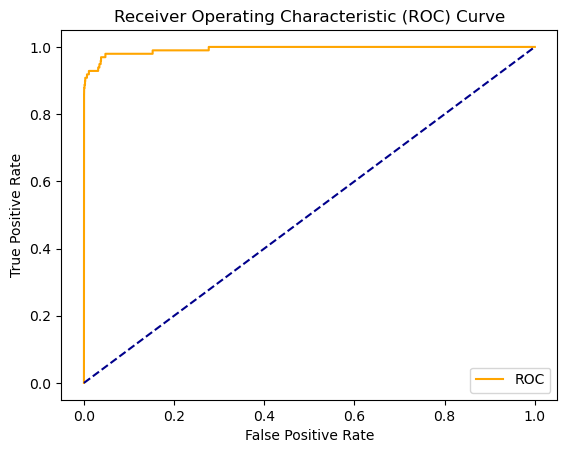

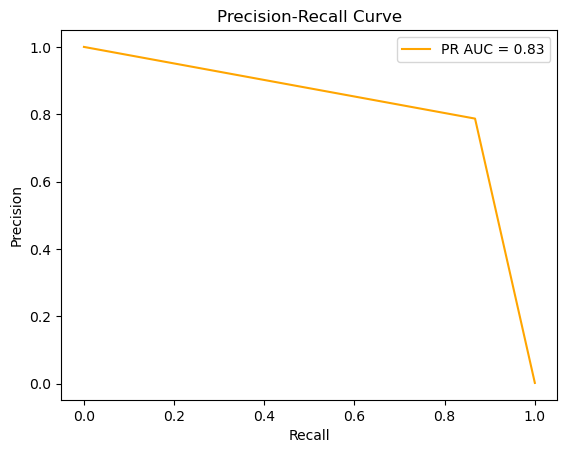

[LightGBM] [Warning] min_data_in_leaf is set=17, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=17
[LightGBM] [Warning] feature_fraction is set=0.6000000000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6000000000000001
[LightGBM] [Warning] min_gain_to_split is set=0.038534470465897, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.038534470465897
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=10, reg_lambda=0.0 will be ignored. Current value: lambda_l2=10
[LightGBM] [Warning] bagging_fraction is set=0.6000000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6000000000000001
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


(LGBMClassifier(bagging_fraction=0.6000000000000001, bagging_freq=1,
                feature_fraction=0.6000000000000001, lambda_l1=0, lambda_l2=10,
                learning_rate=0.2984306628344769, max_bin=117, max_depth=10,
                min_data_in_leaf=17, min_gain_to_split=0.038534470465897,
                num_leaves=372),
 0.8673469387755102,
 0.8252427184466019,
 0.9993679997191109,
 0.9334712324716044,
 0.8273060990681008,
 4.171757221221924)

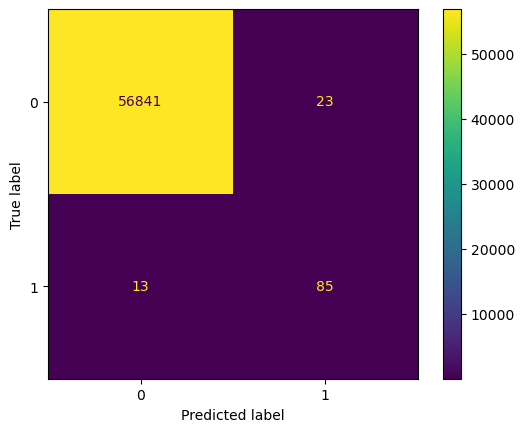

In [40]:
param_lgb = {'max_depth': 10,
		'learning_rate': 0.2984306628344769,
		'num_leaves': 372,
		'min_data_in_leaf': 17,
		'max_bin': 117,
		'lambda_l1': 0,
		'lambda_l2': 10,
		'min_gain_to_split': 0.038534470465897,
		'bagging_fraction': 0.6000000000000001,
		'bagging_freq': 1,
		'feature_fraction':  0.6000000000000001
}

lgb_opt = lgb.LGBMClassifier(**param_lgb)
run_model(lgb_opt, X_train_smt, y_train_smt, X_test, y_test)